In [1]:
import torch
torch.cuda.is_available()
# cuda installation path: C:\Users\Admin\AppData\Local\Temp\CUDA

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [2]:
import csv
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use("ggplot")

import requests
from bs4 import BeautifulSoup
from bs4.element import Comment

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import wordnet
import contractions
from collections import Counter

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix, classification_report, f1_score


In [3]:
NoPoverty_train_aug = pd.read_csv('NoPoverty_train_aug_simplified.csv')
ZeroHunger_train_aug = pd.read_csv('ZeroHunger_train_aug_simplified.csv')
GoodHealth_train_aug = pd.read_csv('GoodHealth_train_aug_simplified.csv')
QualityEducation_train_aug = pd.read_csv('QualityEducation_train_aug_simplified.csv')
GenderEquality_train_aug = pd.read_csv('GenderEquality_train_aug_simplified.csv')
CleanWater_train_aug = pd.read_csv('CleanWater_train_aug_simplified.csv')
AffordableCleanEnergy_train_aug = pd.read_csv('AffordableCleanEnergy_train_aug_simplified.csv')
DecentWork_train_aug = pd.read_csv('DecentWork_train_aug_simplified.csv')
IndustryInnovation_train_aug = pd.read_csv('IndustryInnovation_train_aug_simplified.csv')
ReduceInequality_train_aug = pd.read_csv('ReduceInequality_train_aug_simplified.csv')
SustainableCities_train_aug = pd.read_csv('SustainableCities_train_aug_simplified.csv')
ResponsibleConsumptionProduction_train_aug = pd.read_csv('ResponsibleConsumptionProduction_train_aug_simplified.csv')
ClimateAction_train_aug = pd.read_csv('ClimateAction_train_aug_simplified.csv')
LifeBelowWater_train_aug = pd.read_csv('LifeBelowWater_train_aug_simplified.csv')
LifeonLand_train_aug = pd.read_csv('LifeonLand_train_aug_simplified.csv')
PeaceJustice_train_aug = pd.read_csv('PeaceJustice_train_aug_simplified.csv')
Partnerships_train_aug = pd.read_csv('Partnerships_train_aug_simplified.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'NoPoverty_train_aug_simplified.csv'

In [ ]:
# remove lists from transcripts_simplified
NoPoverty_train_aug['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in NoPoverty_train_aug['transcripts_simplified']]
ZeroHunger_train_aug['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in ZeroHunger_train_aug['transcripts_simplified']]
GoodHealth_train_aug['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in GoodHealth_train_aug['transcripts_simplified']]
QualityEducation_train_aug['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in QualityEducation_train_aug['transcripts_simplified']]
GenderEquality_train_aug['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in GenderEquality_train_aug['transcripts_simplified']]
CleanWater_train_aug['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in CleanWater_train_aug['transcripts_simplified']]
AffordableCleanEnergy_train_aug['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in AffordableCleanEnergy_train_aug['transcripts_simplified']]
DecentWork_train_aug['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in DecentWork_train_aug['transcripts_simplified']]
IndustryInnovation_train_aug['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in IndustryInnovation_train_aug['transcripts_simplified']]
ReduceInequality_train_aug['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in ReduceInequality_train_aug['transcripts_simplified']]
SustainableCities_train_aug['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in SustainableCities_train_aug['transcripts_simplified']]
ResponsibleConsumptionProduction_train_aug['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in ResponsibleConsumptionProduction_train_aug['transcripts_simplified']]
ClimateAction_train_aug ['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in ClimateAction_train_aug['transcripts_simplified']]
LifeBelowWater_train_aug['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in LifeBelowWater_train_aug['transcripts_simplified']]
LifeonLand_train_aug['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in LifeonLand_train_aug['transcripts_simplified']]
PeaceJustice_train_aug['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in PeaceJustice_train_aug['transcripts_simplified']]
Partnerships_train_aug['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in Partnerships_train_aug['transcripts_simplified']]


In [ ]:
NoPoverty_test = pd.read_csv('NoPoverty_test_simplified.csv')
ZeroHunger_test = pd.read_csv('ZeroHunger_test_simplified.csv')
GoodHealth_test = pd.read_csv('GoodHealth_test_simplified.csv')
QualityEducation_test = pd.read_csv('QualityEducation_test_simplified.csv')
GenderEquality_test = pd.read_csv('GenderEquality_test_simplified.csv')
CleanWater_test = pd.read_csv('CleanWater_test_simplified.csv')
AffordableCleanEnergy_test = pd.read_csv('AffordableCleanEnergy_test_simplified.csv')
DecentWork_test = pd.read_csv('DecentWork_test_simplified.csv')
IndustryInnovation_test = pd.read_csv('IndustryInnovation_test_simplified.csv')
ReduceInequality_test = pd.read_csv('ReduceInequality_test_simplified.csv')
SustainableCities_test = pd.read_csv('SustainableCities_test_simplified.csv')
ResponsibleConsumptionProduction_test = pd.read_csv('ResponsibleConsumptionProduction_test_simplified.csv')
ClimateAction_test = pd.read_csv('ClimateAction_test_simplified.csv')
LifeBelowWater_test = pd.read_csv('LifeBelowWater_test_simplified.csv')
LifeonLand_test = pd.read_csv('LifeonLand_test_simplified.csv')
PeaceJustice_test = pd.read_csv('PeaceJustice_test_simplified.csv')
Partnerships_test = pd.read_csv('Partnerships_test_simplified.csv')

In [18]:
# remove lists from transcripts_simplified
NoPoverty_test['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in NoPoverty_test['transcripts_simplified']]
ZeroHunger_test['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in ZeroHunger_test['transcripts_simplified']]
GoodHealth_test['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in GoodHealth_test['transcripts_simplified']]
QualityEducation_test['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in QualityEducation_test['transcripts_simplified']]
GenderEquality_test['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in GenderEquality_test['transcripts_simplified']]
CleanWater_test['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in CleanWater_test['transcripts_simplified']]
AffordableCleanEnergy_test['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in AffordableCleanEnergy_test['transcripts_simplified']]
DecentWork_test['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in DecentWork_test['transcripts_simplified']]
IndustryInnovation_test['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in IndustryInnovation_test['transcripts_simplified']]
ReduceInequality_test['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in ReduceInequality_test['transcripts_simplified']]
SustainableCities_test['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in SustainableCities_test['transcripts_simplified']]
ResponsibleConsumptionProduction_test['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in ResponsibleConsumptionProduction_test['transcripts_simplified']]
ClimateAction_test['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in ClimateAction_test['transcripts_simplified']]
LifeBelowWater_test['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in LifeBelowWater_test['transcripts_simplified']]
LifeonLand_test['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in LifeonLand_test['transcripts_simplified']]
PeaceJustice_test['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in PeaceJustice_test['transcripts_simplified']]
Partnerships_test['transcripts_simplified'] = [' '.join(w) if isinstance(w,list) else w for w in Partnerships_test['transcripts_simplified']]


In [19]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

folds = StratifiedKFold(n_splits=10)

In [20]:
pipe_lr = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words)),
                    ('LR', LogisticRegression(random_state=42))])
pipe_mnb = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words)),
                    ('MNB',MultinomialNB())])
pipe_rf = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words)),
                    ('RF',RandomForestClassifier(random_state=42))])
pipe_knn = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words)),
                    ('KNN', KNeighborsClassifier())])
pipe_svm = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words)),
                     ('SVM', SVC(random_state=42))])
pipe_xgb = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words)),
                     ('XGB', XGBClassifier(random_state=42))])

In [21]:
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50,100,150]
learning_rates = [.1,.2,.3]
tfidf_grams = [(1,1),(1,2)]

lr_param_grid = [{'LR__penalty': ['l1', 'l2'],
                   'LR__C': param_range_fl,
                   'LR__solver': ['liblinear'],
                   'tfidf__ngram_range': tfidf_grams}]
mnb_param_grid = [{'MNB__alpha': np.linspace(0.5, 1.5, 6),
                   'MNB__fit_prior': [True,False],
                   'tfidf__ngram_range': tfidf_grams}]
rf_param_grid = [{'RF__min_samples_leaf': param_range,
                   'RF__max_depth': param_range,
                   'RF__min_samples_split': param_range[1:],
                   'tfidf__ngram_range': tfidf_grams}]
knn_param_grid = [{'KNN__n_neighbors': param_range,
                   'KNN__weights': ['uniform', 'distance'],
                   'KNN__metric': ['euclidean', 'manhattan'],
                   'tfidf__ngram_range': tfidf_grams}]
svm_param_grid = [{'SVM__kernel': ['linear', 'rbf'], 
                    'SVM__C': param_range,
                    'tfidf__ngram_range': tfidf_grams}]
xgb_param_grid = [{'XGB__learning_rate': learning_rates,
                    'XGB__max_depth': param_range,
                    'XGB__min_child_weight': param_range[:2],
                    'XGB__subsample': param_range_fl,
                    'XGB__n_estimators': n_estimators,
                    'tfidf__ngram_range': tfidf_grams}]

In [22]:
scores = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}


def grid_search_wrapper(pipe, param, x_train, y_train, x_test, y_test, refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(pipe, param, scoring=scores, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(x_train, y_train)

    # make the predictions
    y_pred = grid_search.predict(x_test)

    print('\nBest params for {}'.format(refit_score))
    print(grid_search.best_params_)
    
    print('Classification report for {}'.format(refit_score))
    print(classification_report(y_test,grid_search.best_estimator_.predict(x_test)))

    # confusion matrix on the test data.
    print('Confusion matrix of this model optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [23]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(y_test, y_scores, p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)
    
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

In [13]:
NoPoverty_x_train = NoPoverty_train_aug['transcripts_simplified']
NoPoverty_y_train = NoPoverty_train_aug['NoPoverty']
NoPoverty_x_test = NoPoverty_test['transcripts_simplified']
NoPoverty_y_test = NoPoverty_test['NoPoverty']

# NoPoverty_grid_all = grid_search_wrapper(pipeline, params, NoPoverty_x_train, NoPoverty_y_train, NoPoverty_x_test, NoPoverty_y_test, refit_score='f1_score')
NoPoverty_grid_lr = grid_search_wrapper(pipe_lr, lr_param_grid, NoPoverty_x_train, NoPoverty_y_train, NoPoverty_x_test, NoPoverty_y_test, refit_score='f1_score')
NoPoverty_grid_mnb = grid_search_wrapper(pipe_mnb, mnb_param_grid, NoPoverty_x_train, NoPoverty_y_train, NoPoverty_x_test, NoPoverty_y_test, refit_score='f1_score')
NoPoverty_grid_rf = grid_search_wrapper(pipe_rf, rf_param_grid, NoPoverty_x_train, NoPoverty_y_train, NoPoverty_x_test, NoPoverty_y_test, refit_score='f1_score')
NoPoverty_grid_knn = grid_search_wrapper(pipe_knn, knn_param_grid, NoPoverty_x_train, NoPoverty_y_train, NoPoverty_x_test, NoPoverty_y_test, refit_score='f1_score')
NoPoverty_grid_svm = grid_search_wrapper(pipe_svm, svm_param_grid, NoPoverty_x_train, NoPoverty_y_train, NoPoverty_x_test, NoPoverty_y_test, refit_score='f1_score')
NoPoverty_grid_xgb = grid_search_wrapper(pipe_xgb, xgb_param_grid, NoPoverty_x_train, NoPoverty_y_train, NoPoverty_x_test, NoPoverty_y_test, refit_score='f1_score')


Best params for f1_score
{'LR__C': 1.0, 'LR__penalty': 'l2', 'LR__solver': 'liblinear', 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       394
           1       0.10      0.40      0.16         5

    accuracy                           0.95       399
   macro avg       0.55      0.68      0.57       399
weighted avg       0.98      0.95      0.96       399

Confusion matrix of this model optimized for f1_score on the test data:
     pred_neg  pred_pos
neg       376        18
pos         3         2

Best params for f1_score
{'MNB__alpha': 0.5, 'MNB__fit_prior': True, 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       394
           1       0.07      0.60      0.12         5

    accuracy                           0.89       399
   macro avg       0.5

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       394
           1       0.00      0.00      0.00         5

    accuracy                           0.99       399
   macro avg       0.49      0.50      0.50       399
weighted avg       0.98      0.99      0.98       399

Confusion matrix of this model optimized for f1_score on the test data:
     pred_neg  pred_pos
neg       394         0
pos         5         0

Best params for f1_score
{'SVM__C': 1, 'SVM__kernel': 'rbf', 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       394
           1       0.00      0.00      0.00         5

    accuracy                           0.99       399
   macro avg       0.49      0.50      0.50       399
weighted avg       0.98      0.99      0.98       399

Confusion matrix of this model optimized for f1_score on the test data:
   

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,


Best params for f1_score
{'XGB__learning_rate': 0.2, 'XGB__max_depth': 3, 'XGB__min_child_weight': 1, 'XGB__n_estimators': 150, 'XGB__subsample': 1.0, 'tfidf__ngram_range': (1, 1)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       394
           1       0.25      0.20      0.22         5

    accuracy                           0.98       399
   macro avg       0.62      0.60      0.61       399
weighted avg       0.98      0.98      0.98       399

Confusion matrix of this model optimized for f1_score on the test data:
     pred_neg  pred_pos
neg       391         3
pos         4         1


In [25]:
#NoPoverty
NoPoverty_NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('rf', RandomForestClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=2))
            ])

# compute the accuracy using a k-fold validation technique
NoPoverty_scores = []
for train_index, test_index in folds.split(NoPoverty_train_aug.transcripts_simplified,NoPoverty_train_aug.NoPoverty):
    SDG1_X_train, SDG1_X_test, SDG1_y_train, SDG1_y_test = NoPoverty_train_aug.transcripts_simplified[train_index],NoPoverty_train_aug.transcripts_simplified[test_index], \
                                       NoPoverty_train_aug.NoPoverty[train_index], NoPoverty_train_aug.NoPoverty[test_index]
    NoPoverty_scores.append(get_score(NoPoverty_NB_pipeline, SDG1_X_train, SDG1_X_test, SDG1_y_train, SDG1_y_test))

print(NoPoverty_scores)
print(np.mean(NoPoverty_scores))
print(np.std(NoPoverty_scores))

NoPoverty_prediction_test = NoPoverty_NB_pipeline.predict(NoPoverty_test['transcripts_simplified'])
print('NoPoverty test accuracy is {}'.format(accuracy_score(NoPoverty_test['NoPoverty'], NoPoverty_prediction_test)))
print(classification_report(NoPoverty_test['NoPoverty'], NoPoverty_prediction_test))
print(pd.DataFrame(confusion_matrix(NoPoverty_test['NoPoverty'], NoPoverty_prediction_test),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

[0.9838709677419355, 1.0, 0.9967741935483871, 0.9709677419354839, 1.0, 0.9967637540453075, 0.9514563106796117, 0.9935275080906149, 0.9967637540453075, 0.9838187702265372]
0.9873943000313187
0.01485108917641066
NoPoverty test accuracy is 0.9849624060150376
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       394
           1       0.33      0.20      0.25         5

    accuracy                           0.98       399
   macro avg       0.66      0.60      0.62       399
weighted avg       0.98      0.98      0.98       399

     pred_neg  pred_pos
neg       392         2
pos         4         1


     pred_neg  pred_pos
neg       388         6
pos         3         2


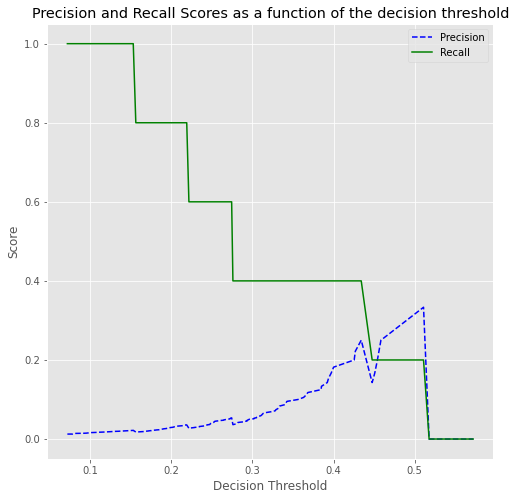

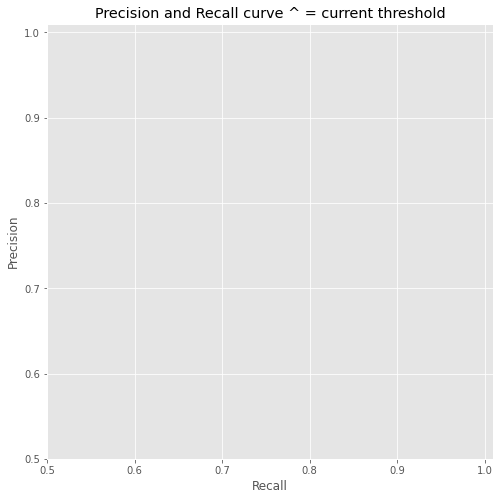

In [35]:
NoPoverty_y_scores = NoPoverty_NB_pipeline.predict_proba(NoPoverty_test['transcripts_simplified'])[:, 1]
NoPoverty_precision, NoPoverty_recall, NoPoverty_thresholds = precision_recall_curve(NoPoverty_test['NoPoverty'], NoPoverty_y_scores)

# map of precision vs recall
plot_precision_recall_vs_threshold(NoPoverty_precision,NoPoverty_recall,NoPoverty_thresholds)

# once found the best threshold, 
precision_recall_threshold(NoPoverty_test['NoPoverty'], NoPoverty_y_scores, NoPoverty_precision, NoPoverty_recall, NoPoverty_thresholds, 0.43)

In [16]:
ZeroHunger_x_train = ZeroHunger_train_aug['transcripts_simplified']
ZeroHunger_y_train = ZeroHunger_train_aug['ZeroHunger']
ZeroHunger_x_test = ZeroHunger_test['transcripts_simplified']
ZeroHunger_y_test = ZeroHunger_test['ZeroHunger']

ZeroHunger_grid_lr = grid_search_wrapper(pipe_lr, lr_param_grid, ZeroHunger_x_train, ZeroHunger_y_train, ZeroHunger_x_test, ZeroHunger_y_test, refit_score='f1_score')
ZeroHunger_grid_mnb = grid_search_wrapper(pipe_mnb, mnb_param_grid, ZeroHunger_x_train, ZeroHunger_y_train, ZeroHunger_x_test, ZeroHunger_y_test, refit_score='f1_score')
ZeroHunger_grid_rf = grid_search_wrapper(pipe_rf, rf_param_grid, ZeroHunger_x_train, ZeroHunger_y_train, ZeroHunger_x_test, ZeroHunger_y_test, refit_score='f1_score')
ZeroHunger_grid_knn = grid_search_wrapper(pipe_knn, knn_param_grid, ZeroHunger_x_train, ZeroHunger_y_train, ZeroHunger_x_test, ZeroHunger_y_test, refit_score='f1_score')
ZeroHunger_grid_svm = grid_search_wrapper(pipe_svm, svm_param_grid, ZeroHunger_x_train, ZeroHunger_y_train, ZeroHunger_x_test, ZeroHunger_y_test, refit_score='f1_score')
ZeroHunger_grid_xgb = grid_search_wrapper(pipe_xgb, xgb_param_grid, ZeroHunger_x_train, ZeroHunger_y_train, ZeroHunger_x_test, ZeroHunger_y_test, refit_score='f1_score')


Best params for f1_score
{'LR__C': 1.0, 'LR__penalty': 'l2', 'LR__solver': 'liblinear', 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       392
           1       0.29      0.29      0.29         7

    accuracy                           0.97       399
   macro avg       0.64      0.64      0.64       399
weighted avg       0.97      0.97      0.97       399

Confusion matrix of this model optimized for f1_score on the test data:
     pred_neg  pred_pos
neg       387         5
pos         5         2

Best params for f1_score
{'MNB__alpha': 0.5, 'MNB__fit_prior': True, 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       392
           1       0.09      0.71      0.17         7

    accuracy                           0.87       399
   macro avg       0.5

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       392
           1       0.00      0.00      0.00         7

    accuracy                           0.98       399
   macro avg       0.49      0.50      0.50       399
weighted avg       0.97      0.98      0.97       399

Confusion matrix of this model optimized for f1_score on the test data:
     pred_neg  pred_pos
neg       392         0
pos         7         0

Best params for f1_score
{'SVM__C': 4, 'SVM__kernel': 'rbf', 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       392
           1       0.00      0.00      0.00         7

    accuracy                           0.98       399
   macro avg       0.49      0.50      0.50       399
weighted avg       0.97      0.98      0.97       399

Confusion matrix of this model optimized for f1_score on the test data:
   

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,


Best params for f1_score
{'XGB__learning_rate': 0.2, 'XGB__max_depth': 6, 'XGB__min_child_weight': 1, 'XGB__n_estimators': 100, 'XGB__subsample': 0.5, 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       392
           1       0.00      0.00      0.00         7

    accuracy                           0.97       399
   macro avg       0.49      0.50      0.49       399
weighted avg       0.97      0.97      0.97       399

Confusion matrix of this model optimized for f1_score on the test data:
     pred_neg  pred_pos
neg       389         3
pos         7         0


In [38]:
#ZeroHunger
ZeroHunger_NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('rf',RandomForestClassifier(max_depth=6, min_samples_leaf=1, min_samples_split=3))
            ])

# compute the accuracy using a k-fold validation technique
ZeroHunger_scores = []
for train_index, test_index in folds.split(ZeroHunger_train_aug.transcripts_simplified,ZeroHunger_train_aug.ZeroHunger):
    SDG2_X_train, SDG2_X_test, SDG2_y_train, SDG2_y_test = ZeroHunger_train_aug.transcripts_simplified[train_index],ZeroHunger_train_aug.transcripts_simplified[test_index], \
                                       ZeroHunger_train_aug.ZeroHunger[train_index], ZeroHunger_train_aug.ZeroHunger[test_index]
    ZeroHunger_scores.append(get_score(ZeroHunger_NB_pipeline, SDG2_X_train, SDG2_X_test, SDG2_y_train, SDG2_y_test))

print(ZeroHunger_scores)
print(np.mean(ZeroHunger_scores))
print(np.std(ZeroHunger_scores))

ZeroHunger_prediction_test = ZeroHunger_NB_pipeline.predict(ZeroHunger_test['transcripts_simplified'])
print('ZeroHunger test accuracy is {}'.format(accuracy_score(ZeroHunger_test['ZeroHunger'], ZeroHunger_prediction_test)))
print(classification_report(ZeroHunger_test['ZeroHunger'], ZeroHunger_prediction_test))
print(pd.DataFrame(confusion_matrix(ZeroHunger_test['ZeroHunger'], ZeroHunger_prediction_test),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

[0.9225806451612903, 0.9290322580645162, 0.9387096774193548, 0.9419354838709677, 0.9352750809061489, 0.9449838187702265, 0.9449838187702265, 0.919093851132686, 0.9579288025889967, 0.9061488673139159]
0.934067230399833
0.014330278194896393
ZeroHunger test accuracy is 0.9699248120300752
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       392
           1       0.27      0.43      0.33         7

    accuracy                           0.97       399
   macro avg       0.63      0.70      0.66       399
weighted avg       0.98      0.97      0.97       399

     pred_neg  pred_pos
neg       384         8
pos         4         3


     pred_neg  pred_pos
neg       387         5
pos         4         3


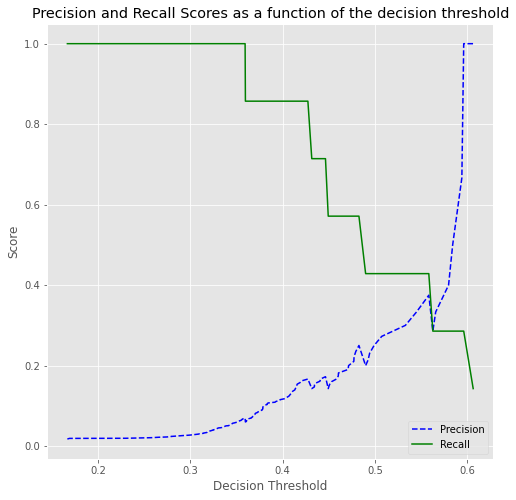

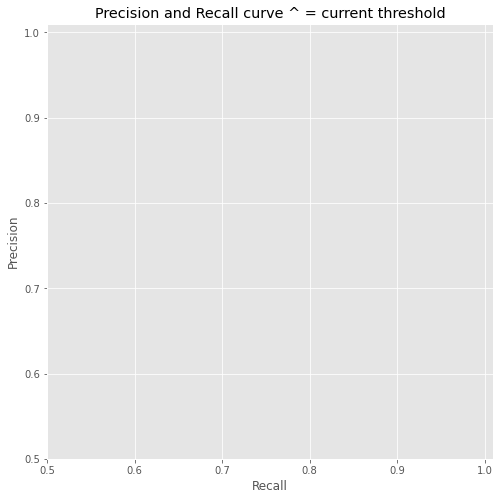

In [46]:
ZeroHunger_y_scores = ZeroHunger_NB_pipeline.predict_proba(ZeroHunger_test['transcripts_simplified'])[:, 1]
ZeroHunger_precision, ZeroHunger_recall, ZeroHunger_thresholds = precision_recall_curve(ZeroHunger_test['ZeroHunger'], ZeroHunger_y_scores)

# map of precision vs recall
plot_precision_recall_vs_threshold(ZeroHunger_precision,ZeroHunger_recall,ZeroHunger_thresholds)

# once found the best threshold, 
precision_recall_threshold(ZeroHunger_test['ZeroHu0.55nger'], ZeroHunger_y_scores, ZeroHunger_precision, ZeroHunger_recall, ZeroHunger_thresholds, 0.55)

In [19]:
GoodHealth_x_train = GoodHealth_train_aug['transcripts_simplified']
GoodHealth_y_train = GoodHealth_train_aug['GoodHealth']
GoodHealth_x_test = GoodHealth_test['transcripts_simplified']
GoodHealth_y_test = GoodHealth_test['GoodHealth']

GoodHealth_grid_lr = grid_search_wrapper(pipe_lr, lr_param_grid, GoodHealth_x_train, GoodHealth_y_train, GoodHealth_x_test, GoodHealth_y_test, refit_score='f1_score')
GoodHealth_grid_mnb = grid_search_wrapper(pipe_mnb, mnb_param_grid, GoodHealth_x_train, GoodHealth_y_train, GoodHealth_x_test, GoodHealth_y_test, refit_score='f1_score')
GoodHealth_grid_rf = grid_search_wrapper(pipe_rf, rf_param_grid, GoodHealth_x_train, GoodHealth_y_train, GoodHealth_x_test, GoodHealth_y_test, refit_score='f1_score')
GoodHealth_grid_knn = grid_search_wrapper(pipe_knn, knn_param_grid, GoodHealth_x_train, GoodHealth_y_train, GoodHealth_x_test, GoodHealth_y_test, refit_score='f1_score')
GoodHealth_grid_svm = grid_search_wrapper(pipe_svm, svm_param_grid, GoodHealth_x_train, GoodHealth_y_train, GoodHealth_x_test, GoodHealth_y_test, refit_score='f1_score')
GoodHealth_grid_xgb = grid_search_wrapper(pipe_xgb, xgb_param_grid, GoodHealth_x_train, GoodHealth_y_train, GoodHealth_x_test, GoodHealth_y_test, refit_score='f1_score')


Best params for f1_score
{'LR__C': 1.0, 'LR__penalty': 'l2', 'LR__solver': 'liblinear', 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       212
           1       0.94      0.86      0.90       187

    accuracy                           0.91       399
   macro avg       0.91      0.90      0.91       399
weighted avg       0.91      0.91      0.91       399

Confusion matrix of this model optimized for f1_score on the test data:
     pred_neg  pred_pos
neg       202        10
pos        27       160

Best params for f1_score
{'MNB__alpha': 0.5, 'MNB__fit_prior': False, 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       212
           1       0.89      0.86      0.87       187

    accuracy                           0.88       399
   macro avg       0.

In [48]:
#GoodHealth
GoodHealth_NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words, ngram_range=(1,2))),
                ('lr', LogisticRegression(C=1, penalty='l2',solver='liblinear'))
            ])

# compute the accuracy using a k-fold validation technique
GoodHealth_scores = []
for train_index, test_index in folds.split(GoodHealth_train_aug.transcripts_simplified,GoodHealth_train_aug.GoodHealth):
    SDG3_X_train, SDG3_X_test, SDG3_y_train, SDG3_y_test = GoodHealth_train_aug.transcripts_simplified[train_index],GoodHealth_train_aug.transcripts_simplified[test_index], \
                                       GoodHealth_train_aug.GoodHealth[train_index], GoodHealth_train_aug.GoodHealth[test_index]
    GoodHealth_scores.append(get_score(GoodHealth_NB_pipeline, SDG3_X_train, SDG3_X_test, SDG3_y_train, SDG3_y_test))

print(GoodHealth_scores)
print(np.mean(GoodHealth_scores))
print(np.std(GoodHealth_scores))

GoodHealth_prediction_test = GoodHealth_NB_pipeline.predict(GoodHealth_test['transcripts_simplified'])
print('GoodHealth test accuracy is {}'.format(accuracy_score(GoodHealth_test['GoodHealth'], GoodHealth_prediction_test)))
print(classification_report(GoodHealth_test['GoodHealth'], GoodHealth_prediction_test))
print(pd.DataFrame(confusion_matrix(GoodHealth_test['GoodHealth'], GoodHealth_prediction_test),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

[0.8565217391304348, 0.9304347826086956, 0.9, 0.9217391304347826, 0.8820960698689956, 0.9213973799126638, 0.9039301310043668, 0.9213973799126638, 0.8951965065502183, 0.9039301310043668]
0.903664325042719
0.021083557644972398
GoodHealth test accuracy is 0.9022556390977443
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       212
           1       0.94      0.85      0.89       187

    accuracy                           0.90       399
   macro avg       0.91      0.90      0.90       399
weighted avg       0.90      0.90      0.90       399

     pred_neg  pred_pos
neg       201        11
pos        28       159


     pred_neg  pred_pos
neg       194        18
pos        20       167


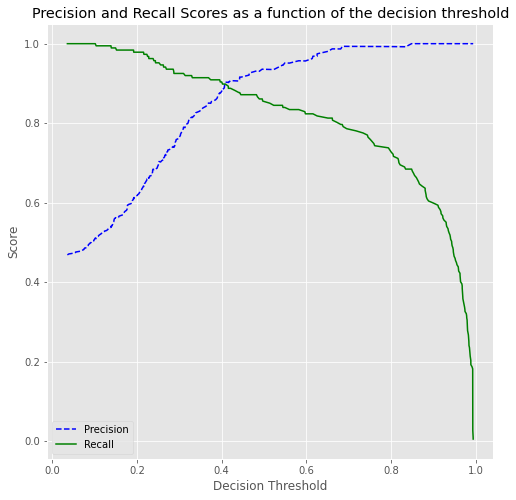

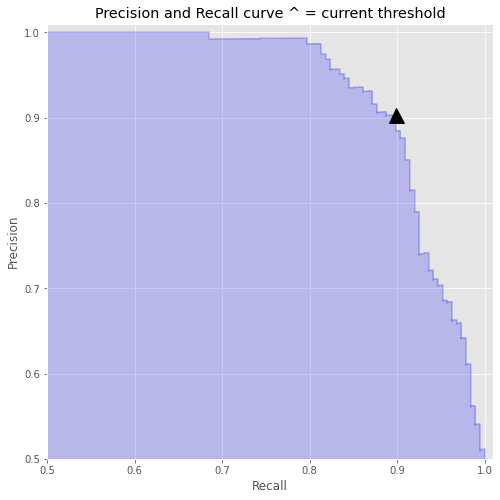

In [62]:
GoodHealth_y_scores = GoodHealth_NB_pipeline.predict_proba(GoodHealth_test['transcripts_simplified'])[:, 1]
GoodHealth_precision, GoodHealth_recall, GoodHealth_thresholds = precision_recall_curve(GoodHealth_test['GoodHealth'], GoodHealth_y_scores)

# map of precision vs recall
plot_precision_recall_vs_threshold(GoodHealth_precision,GoodHealth_recall,GoodHealth_thresholds)

# once found the best threshold, 
precision_recall_threshold(GoodHealth_test['GoodHealth'], GoodHealth_y_scores, GoodHealth_precision, GoodHealth_recall, GoodHealth_thresholds, 0.41)

In [22]:
QualityEducation_x_train = QualityEducation_train_aug['transcripts_simplified']
QualityEducation_y_train = QualityEducation_train_aug['QualityEducation']
QualityEducation_x_test = QualityEducation_test['transcripts_simplified']
QualityEducation_y_test = QualityEducation_test['QualityEducation']

QualityEducation_grid_lr = grid_search_wrapper(pipe_lr, lr_param_grid, QualityEducation_x_train, QualityEducation_y_train, QualityEducation_x_test, QualityEducation_y_test, refit_score='f1_score')
QualityEducation_grid_mnb = grid_search_wrapper(pipe_mnb, mnb_param_grid, QualityEducation_x_train, QualityEducation_y_train, QualityEducation_x_test, QualityEducation_y_test, refit_score='f1_score')
QualityEducation_grid_rf = grid_search_wrapper(pipe_rf, rf_param_grid, QualityEducation_x_train, QualityEducation_y_train, QualityEducation_x_test, QualityEducation_y_test, refit_score='f1_score')
QualityEducation_grid_knn = grid_search_wrapper(pipe_knn, knn_param_grid, QualityEducation_x_train, QualityEducation_y_train, QualityEducation_x_test, QualityEducation_y_test, refit_score='f1_score')
QualityEducation_grid_svm = grid_search_wrapper(pipe_svm, svm_param_grid, QualityEducation_x_train, QualityEducation_y_train, QualityEducation_x_test, QualityEducation_y_test, refit_score='f1_score')
QualityEducation_grid_xgb = grid_search_wrapper(pipe_xgb, xgb_param_grid, QualityEducation_x_train, QualityEducation_y_train, QualityEducation_x_test, QualityEducation_y_test, refit_score='f1_score')


Best params for f1_score
{'LR__C': 1.0, 'LR__penalty': 'l2', 'LR__solver': 'liblinear', 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       370
           1       0.35      0.59      0.44        29

    accuracy                           0.89       399
   macro avg       0.66      0.75      0.69       399
weighted avg       0.92      0.89      0.90       399

Confusion matrix of this model optimized for f1_score on the test data:
     pred_neg  pred_pos
neg       338        32
pos        12        17

Best params for f1_score
{'MNB__alpha': 0.5, 'MNB__fit_prior': False, 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       370
           1       0.23      0.66      0.34        29

    accuracy                           0.81       399
   macro avg       0.

In [65]:
#QualityEducation
QualityEducation_NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words, ngram_range=(1,2))),
                ('svm',SVC(C=4, kernel='rbf',probability=True))
            ])

# compute the accuracy using a k-fold validation technique
QualityEducation_scores = []
for train_index, test_index in folds.split(QualityEducation_train_aug.transcripts_simplified,QualityEducation_train_aug.QualityEducation):
    SDG4_X_train, SDG4_X_test, SDG4_y_train, SDG4_y_test = QualityEducation_train_aug.transcripts_simplified[train_index],QualityEducation_train_aug.transcripts_simplified[test_index], \
                                       QualityEducation_train_aug.QualityEducation[train_index], QualityEducation_train_aug.QualityEducation[test_index]
    QualityEducation_scores.append(get_score(QualityEducation_NB_pipeline, SDG4_X_train, SDG4_X_test, SDG4_y_train, SDG4_y_test))

print(QualityEducation_scores)
print(np.mean(QualityEducation_scores))
print(np.std(QualityEducation_scores))

QualityEducation_prediction_test = QualityEducation_NB_pipeline.predict(QualityEducation_test['transcripts_simplified'])
print('QualityEducation test accuracy is {}'.format(accuracy_score(QualityEducation_test['QualityEducation'], QualityEducation_prediction_test)))
print(classification_report(QualityEducation_test['QualityEducation'], QualityEducation_prediction_test))
print(pd.DataFrame(confusion_matrix(QualityEducation_test['QualityEducation'], QualityEducation_prediction_test),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

[0.9935483870967742, 0.9838709677419355, 0.9709677419354839, 0.9870967741935484, 0.9838187702265372, 0.9741100323624595, 0.9773462783171522, 0.9967637540453075, 0.9838187702265372, 0.9805825242718447]
0.983192400041758
0.007621270546710198
QualityEducation test accuracy is 0.9423558897243107
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       370
           1       0.65      0.45      0.53        29

    accuracy                           0.94       399
   macro avg       0.80      0.71      0.75       399
weighted avg       0.94      0.94      0.94       399

     pred_neg  pred_pos
neg       363         7
pos        16        13


     pred_neg  pred_pos
neg       361         9
pos        14        15


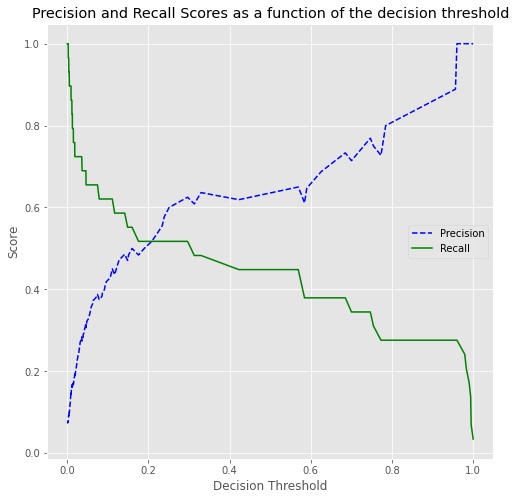

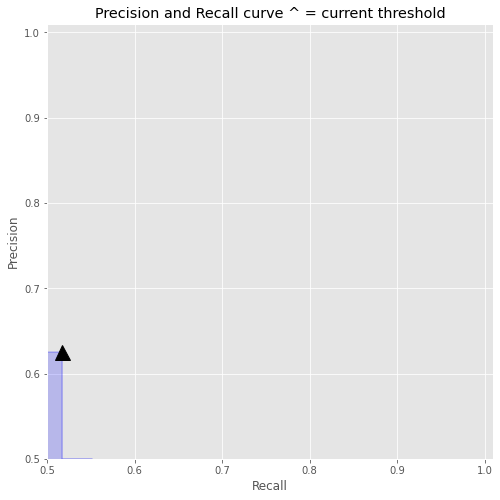

In [79]:
QualityEducation_y_scores = QualityEducation_NB_pipeline.predict_proba(QualityEducation_test['transcripts_simplified'])[:, 1]
QualityEducation_precision, QualityEducation_recall, QualityEducation_thresholds = precision_recall_curve(QualityEducation_test['QualityEducation'], QualityEducation_y_scores)

# map of precision vs recall
plot_precision_recall_vs_threshold(QualityEducation_precision,QualityEducation_recall,QualityEducation_thresholds)

# once found the best threshold, 
precision_recall_threshold(QualityEducation_test['QualityEducation'], QualityEducation_y_scores, QualityEducation_precision, QualityEducation_recall, QualityEducation_thresholds, 0.29)

In [25]:
GenderEquality_x_train = GenderEquality_train_aug['transcripts_simplified']
GenderEquality_y_train = GenderEquality_train_aug['GenderEquality']
GenderEquality_x_test = GenderEquality_test['transcripts_simplified']
GenderEquality_y_test = GenderEquality_test['GenderEquality']

GenderEquality_grid_lr = grid_search_wrapper(pipe_lr, lr_param_grid, GenderEquality_x_train, GenderEquality_y_train, GenderEquality_x_test, GenderEquality_y_test, refit_score='f1_score')
GenderEquality_grid_mnb = grid_search_wrapper(pipe_mnb, mnb_param_grid, GenderEquality_x_train, GenderEquality_y_train, GenderEquality_x_test, GenderEquality_y_test, refit_score='f1_score')
GenderEquality_grid_rf = grid_search_wrapper(pipe_rf, rf_param_grid, GenderEquality_x_train, GenderEquality_y_train, GenderEquality_x_test, GenderEquality_y_test, refit_score='f1_score')
GenderEquality_grid_knn = grid_search_wrapper(pipe_knn, knn_param_grid, GenderEquality_x_train, GenderEquality_y_train, GenderEquality_x_test, GenderEquality_y_test, refit_score='f1_score')
GenderEquality_grid_svm = grid_search_wrapper(pipe_svm, svm_param_grid, GenderEquality_x_train, GenderEquality_y_train, GenderEquality_x_test, GenderEquality_y_test, refit_score='f1_score')
GenderEquality_grid_xgb = grid_search_wrapper(pipe_xgb, xgb_param_grid, GenderEquality_x_train, GenderEquality_y_train, GenderEquality_x_test, GenderEquality_y_test, refit_score='f1_score')


Best params for f1_score
{'LR__C': 1.0, 'LR__penalty': 'l2', 'LR__solver': 'liblinear', 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       378
           1       0.24      0.62      0.34        21

    accuracy                           0.87       399
   macro avg       0.61      0.75      0.64       399
weighted avg       0.94      0.87      0.90       399

Confusion matrix of this model optimized for f1_score on the test data:
     pred_neg  pred_pos
neg       336        42
pos         8        13

Best params for f1_score
{'MNB__alpha': 0.5, 'MNB__fit_prior': False, 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       378
           1       0.16      0.71      0.27        21

    accuracy                           0.79       399
   macro avg       0.

In [81]:
#GenderEquality
GenderEquality_NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('xgb', XGBClassifier(learning_rates=0.3, max_depth=6, min_child_weight=1, n_estimators=150,subsample=1))
            ])

# compute the accuracy using a k-fold validation technique
GenderEquality_scores = []
for train_index, test_index in folds.split(GenderEquality_train_aug.transcripts_simplified,GenderEquality_train_aug.GenderEquality):
    SDG5_X_train, SDG5_X_test, SDG5_y_train, SDG5_y_test = GenderEquality_train_aug.transcripts_simplified[train_index],GenderEquality_train_aug.transcripts_simplified[test_index], \
                                       GenderEquality_train_aug.GenderEquality[train_index], GenderEquality_train_aug.GenderEquality[test_index]
    GenderEquality_scores.append(get_score(GenderEquality_NB_pipeline, SDG5_X_train, SDG5_X_test, SDG5_y_train, SDG5_y_test))

print(GenderEquality_scores)
print(np.mean(GenderEquality_scores))
print(np.std(GenderEquality_scores))

GenderEquality_prediction_test = GenderEquality_NB_pipeline.predict(GenderEquality_test['transcripts_simplified'])
print('GenderEquality test accuracy is {}'.format(accuracy_score(GenderEquality_test['GenderEquality'], GenderEquality_prediction_test)))
print(classification_report(GenderEquality_test['GenderEquality'], GenderEquality_prediction_test))
print(pd.DataFrame(confusion_matrix(GenderEquality_test['GenderEquality'], GenderEquality_prediction_test),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

[12:31:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learning_rates" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:31:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learning_rates" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:31:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learning_rates" } might not be used.


     pred_neg  pred_pos
neg       364        14
pos        10        11


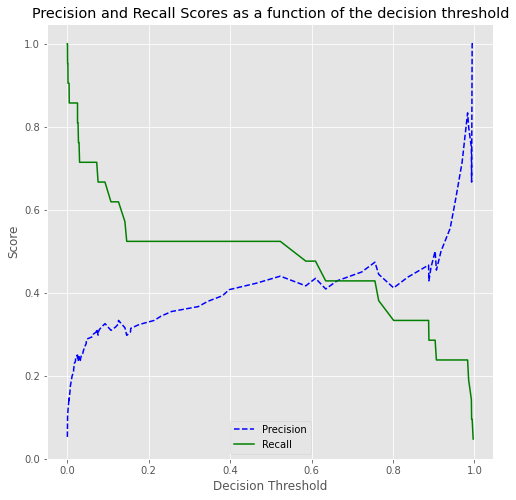

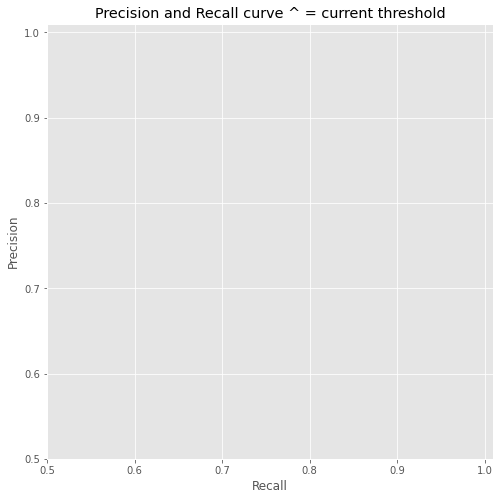

In [91]:
GenderEquality_y_scores = GenderEquality_NB_pipeline.predict_proba(GenderEquality_test['transcripts_simplified'])[:, 1]
GenderEquality_precision, GenderEquality_recall, GenderEquality_thresholds = precision_recall_curve(GenderEquality_test['GenderEquality'], GenderEquality_y_scores)

# map of precision vs recall
plot_precision_recall_vs_threshold(GenderEquality_precision,GenderEquality_recall,GenderEquality_thresholds)

# once found the best threshold, 
precision_recall_threshold(GenderEquality_test['GenderEquality'], GenderEquality_y_scores, GenderEquality_precision, GenderEquality_recall, GenderEquality_thresholds, 0.50)

In [28]:
CleanWater_x_train = CleanWater_train_aug['transcripts_simplified']
CleanWater_y_train = CleanWater_train_aug['CleanWater']
CleanWater_x_test = CleanWater_test['transcripts_simplified']
CleanWater_y_test = CleanWater_test['CleanWater']

CleanWater_grid_lr = grid_search_wrapper(pipe_lr, lr_param_grid, CleanWater_x_train, CleanWater_y_train, CleanWater_x_test, CleanWater_y_test, refit_score='f1_score')
CleanWater_grid_mnb = grid_search_wrapper(pipe_mnb, mnb_param_grid, CleanWater_x_train, CleanWater_y_train, CleanWater_x_test, CleanWater_y_test, refit_score='f1_score')
CleanWater_grid_rf = grid_search_wrapper(pipe_rf, rf_param_grid, CleanWater_x_train, CleanWater_y_train, CleanWater_x_test, CleanWater_y_test, refit_score='f1_score')
CleanWater_grid_knn = grid_search_wrapper(pipe_knn, knn_param_grid, CleanWater_x_train, CleanWater_y_train, CleanWater_x_test, CleanWater_y_test, refit_score='f1_score')
CleanWater_grid_svm = grid_search_wrapper(pipe_svm, svm_param_grid, CleanWater_x_train, CleanWater_y_train, CleanWater_x_test, CleanWater_y_test, refit_score='f1_score')
CleanWater_grid_xgb = grid_search_wrapper(pipe_xgb, xgb_param_grid, CleanWater_x_train, CleanWater_y_train, CleanWater_x_test, CleanWater_y_test, refit_score='f1_score')


Best params for f1_score
{'LR__C': 1.0, 'LR__penalty': 'l1', 'LR__solver': 'liblinear', 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       396
           1       0.60      1.00      0.75         3

    accuracy                           0.99       399
   macro avg       0.80      1.00      0.87       399
weighted avg       1.00      0.99      1.00       399

Confusion matrix of this model optimized for f1_score on the test data:
     pred_neg  pred_pos
neg       394         2
pos         0         3

Best params for f1_score
{'MNB__alpha': 0.5, 'MNB__fit_prior': True, 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       396
           1       0.10      1.00      0.18         3

    accuracy                           0.93       399
   macro avg       0.5

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       396
           1       0.00      0.00      0.00         3

    accuracy                           0.99       399
   macro avg       0.50      0.50      0.50       399
weighted avg       0.99      0.99      0.99       399

Confusion matrix of this model optimized for f1_score on the test data:
     pred_neg  pred_pos
neg       396         0
pos         3         0

Best params for f1_score
{'SVM__C': 1, 'SVM__kernel': 'rbf', 'tfidf__ngram_range': (1, 1)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       396
           1       1.00      0.33      0.50         3

    accuracy                           0.99       399
   macro avg       1.00      0.67      0.75       399
weighted avg       1.00      0.99      0.99       399

Confusion matrix of this model optimized for f1_score on the test data:
   

In [93]:
#CleanWater
CleanWater_NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words,ngram_range=(1,2))),
                ('lr',LogisticRegression(C=1, penalty='l1', solver='liblinear'))
            ])

# compute the accuracy using a k-fold validation technique
CleanWater_scores = []
for train_index, test_index in folds.split(CleanWater_train_aug.transcripts_simplified,CleanWater_train_aug.CleanWater):
    SDG6_X_train, SDG6_X_test, SDG6_y_train, SDG6_y_test = CleanWater_train_aug.transcripts_simplified[train_index],CleanWater_train_aug.transcripts_simplified[test_index], \
                                       CleanWater_train_aug.CleanWater[train_index], CleanWater_train_aug.CleanWater[test_index]
    CleanWater_scores.append(get_score(CleanWater_NB_pipeline, SDG6_X_train, SDG6_X_test, SDG6_y_train, SDG6_y_test))

print(CleanWater_scores)
print(np.mean(CleanWater_scores))
print(np.std(CleanWater_scores))

CleanWater_prediction_test = CleanWater_NB_pipeline.predict(CleanWater_test['transcripts_simplified'])
print('CleanWater test accuracy is {}'.format(accuracy_score(CleanWater_test['CleanWater'], CleanWater_prediction_test)))
print(classification_report(CleanWater_test['CleanWater'], CleanWater_prediction_test))
print(pd.DataFrame(confusion_matrix(CleanWater_test['CleanWater'], CleanWater_prediction_test),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

[0.9935483870967742, 0.9870967741935484, 0.9967741935483871, 0.9967741935483871, 0.9902912621359223, 0.9967637540453075, 0.9838187702265372, 0.9967637540453075, 0.9935275080906149, 0.9935275080906149]
0.9928886105021402
0.0042899214512246925
CleanWater test accuracy is 0.9899749373433584
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       396
           1       0.43      1.00      0.60         3

    accuracy                           0.99       399
   macro avg       0.71      0.99      0.80       399
weighted avg       1.00      0.99      0.99       399

     pred_neg  pred_pos
neg       392         4
pos         0         3


     pred_neg  pred_pos
neg       395         1
pos         0         3


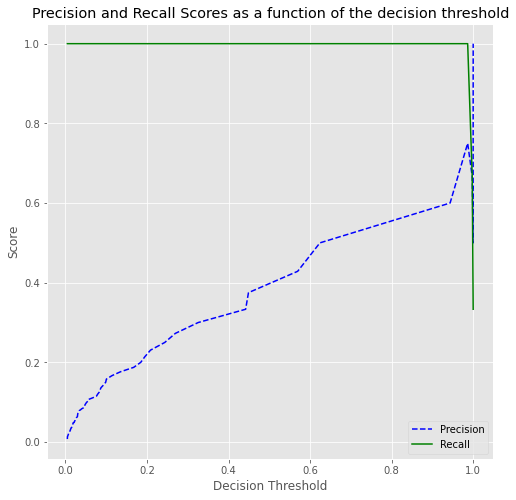

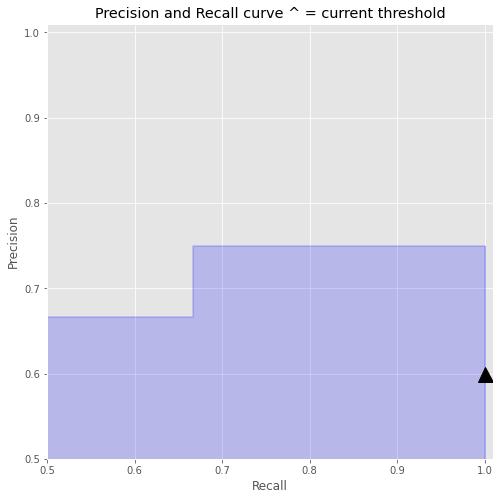

In [100]:
CleanWater_y_scores = CleanWater_NB_pipeline.predict_proba(CleanWater_test['transcripts_simplified'])[:, 1]
CleanWater_precision, CleanWater_recall, CleanWater_thresholds = precision_recall_curve(CleanWater_test['CleanWater'], CleanWater_y_scores)

# map of precision vs recall
plot_precision_recall_vs_threshold(CleanWater_precision,CleanWater_recall,CleanWater_thresholds)

# once found the best threshold, 
precision_recall_threshold(CleanWater_test['CleanWater'], CleanWater_y_scores, CleanWater_precision, CleanWater_recall, CleanWater_thresholds, 0.95)

In [32]:
AffordableCleanEnergy_x_train = AffordableCleanEnergy_train_aug['transcripts_simplified']
AffordableCleanEnergy_y_train = AffordableCleanEnergy_train_aug['AffordableCleanEnergy']
AffordableCleanEnergy_x_test = AffordableCleanEnergy_test['transcripts_simplified']
AffordableCleanEnergy_y_test = AffordableCleanEnergy_test['AffordableCleanEnergy']

AffordableCleanEnergy_grid_lr = grid_search_wrapper(pipe_lr, lr_param_grid, AffordableCleanEnergy_x_train, AffordableCleanEnergy_y_train, AffordableCleanEnergy_x_test, AffordableCleanEnergy_y_test, refit_score='f1_score')
AffordableCleanEnergy_grid_mnb = grid_search_wrapper(pipe_mnb, mnb_param_grid, AffordableCleanEnergy_x_train, AffordableCleanEnergy_y_train, AffordableCleanEnergy_x_test, AffordableCleanEnergy_y_test, refit_score='f1_score')
AffordableCleanEnergy_grid_rf = grid_search_wrapper(pipe_rf, rf_param_grid, AffordableCleanEnergy_x_train, AffordableCleanEnergy_y_train, AffordableCleanEnergy_x_test, AffordableCleanEnergy_y_test, refit_score='f1_score')
AffordableCleanEnergy_grid_knn = grid_search_wrapper(pipe_knn, knn_param_grid, AffordableCleanEnergy_x_train, AffordableCleanEnergy_y_train, AffordableCleanEnergy_x_test, AffordableCleanEnergy_y_test, refit_score='f1_score')
AffordableCleanEnergy_grid_svm = grid_search_wrapper(pipe_svm, svm_param_grid, AffordableCleanEnergy_x_train, AffordableCleanEnergy_y_train, AffordableCleanEnergy_x_test, AffordableCleanEnergy_y_test, refit_score='f1_score')
AffordableCleanEnergy_grid_xgb = grid_search_wrapper(pipe_xgb, xgb_param_grid, AffordableCleanEnergy_x_train, AffordableCleanEnergy_y_train, AffordableCleanEnergy_x_test, AffordableCleanEnergy_y_test, refit_score='f1_score')


Best params for f1_score
{'LR__C': 1.0, 'LR__penalty': 'l2', 'LR__solver': 'liblinear', 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       392
           1       0.14      0.29      0.19         7

    accuracy                           0.96       399
   macro avg       0.56      0.63      0.58       399
weighted avg       0.97      0.96      0.96       399

Confusion matrix of this model optimized for f1_score on the test data:
     pred_neg  pred_pos
neg       380        12
pos         5         2

Best params for f1_score
{'MNB__alpha': 0.5, 'MNB__fit_prior': True, 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       392
           1       0.09      0.57      0.16         7

    accuracy                           0.89       399
   macro avg       0.5

In [101]:
#AffordableCleanEnergy
AffordableCleanEnergy_NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words, ngram_range=(1,2))), 
                ('xgb',XGBClassifier(learning_rates=0.3, max_depth=6,min_child_weight=1, n_estimators=50,subsample=0.5))
            ])

# compute the accuracy using a k-fold validation technique
AffordableCleanEnergy_scores = []
for train_index, test_index in folds.split(AffordableCleanEnergy_train_aug.transcripts_simplified,AffordableCleanEnergy_train_aug.AffordableCleanEnergy):
    SDG7_X_train, SDG7_X_test, SDG7_y_train, SDG7_y_test = AffordableCleanEnergy_train_aug.transcripts_simplified[train_index],AffordableCleanEnergy_train_aug.transcripts_simplified[test_index], \
                                       AffordableCleanEnergy_train_aug.AffordableCleanEnergy[train_index], AffordableCleanEnergy_train_aug.AffordableCleanEnergy[test_index]
    AffordableCleanEnergy_scores.append(get_score(AffordableCleanEnergy_NB_pipeline, SDG7_X_train, SDG7_X_test, SDG7_y_train, SDG7_y_test))

print(AffordableCleanEnergy_scores)
print(np.mean(AffordableCleanEnergy_scores))
print(np.std(AffordableCleanEnergy_scores))

AffordableCleanEnergy_prediction_test = AffordableCleanEnergy_NB_pipeline.predict(AffordableCleanEnergy_test['transcripts_simplified'])
print('AffordableCleanEnergy test accuracy is {}'.format(accuracy_score(AffordableCleanEnergy_test['AffordableCleanEnergy'], AffordableCleanEnergy_prediction_test)))
print(classification_report(AffordableCleanEnergy_test['AffordableCleanEnergy'], AffordableCleanEnergy_prediction_test))
print(pd.DataFrame(confusion_matrix(AffordableCleanEnergy_test['AffordableCleanEnergy'], AffordableCleanEnergy_prediction_test),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

[12:40:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learning_rates" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:40:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learning_rates" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:40:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learning_rates" } might not be used.


     pred_neg  pred_pos
neg       387         5
pos         4         3


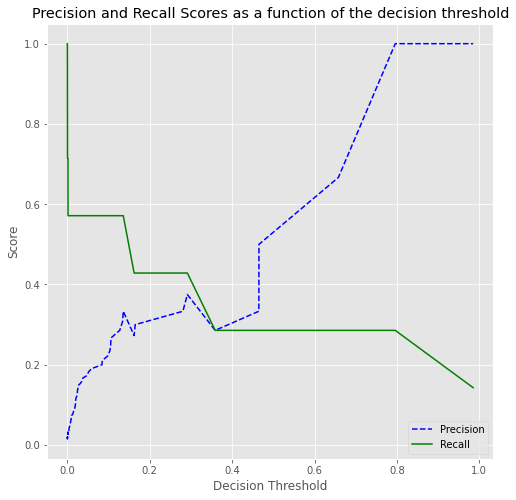

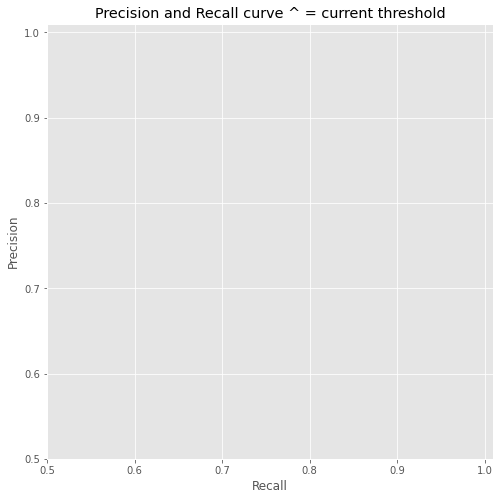

In [118]:
AffordableCleanEnergy_y_scores = AffordableCleanEnergy_NB_pipeline.predict_proba(AffordableCleanEnergy_test['transcripts_simplified'])[:, 1]
AffordableCleanEnergy_precision, AffordableCleanEnergy_recall, AffordableCleanEnergy_thresholds = precision_recall_curve(AffordableCleanEnergy_test['AffordableCleanEnergy'], AffordableCleanEnergy_y_scores)

# map of precision vs recall
plot_precision_recall_vs_threshold(AffordableCleanEnergy_precision,AffordableCleanEnergy_recall,AffordableCleanEnergy_thresholds)

# once found the best threshold, 
precision_recall_threshold(AffordableCleanEnergy_test['AffordableCleanEnergy'], AffordableCleanEnergy_y_scores, AffordableCleanEnergy_precision, AffordableCleanEnergy_recall, AffordableCleanEnergy_thresholds, 0.29)

In [33]:
DecentWork_x_train = DecentWork_train_aug['transcripts_simplified']
DecentWork_y_train = DecentWork_train_aug['DecentWork']
DecentWork_x_test = DecentWork_test['transcripts_simplified']
DecentWork_y_test = DecentWork_test['DecentWork']

DecentWork_grid_lr = grid_search_wrapper(pipe_lr, lr_param_grid, DecentWork_x_train, DecentWork_y_train, DecentWork_x_test, DecentWork_y_test, refit_score='f1_score')
DecentWork_grid_mnb = grid_search_wrapper(pipe_mnb, mnb_param_grid, DecentWork_x_train, DecentWork_y_train, DecentWork_x_test, DecentWork_y_test, refit_score='f1_score')
DecentWork_grid_rf = grid_search_wrapper(pipe_rf, rf_param_grid, DecentWork_x_train, DecentWork_y_train, DecentWork_x_test, DecentWork_y_test, refit_score='f1_score')
DecentWork_grid_knn = grid_search_wrapper(pipe_knn, knn_param_grid, DecentWork_x_train, DecentWork_y_train, DecentWork_x_test, DecentWork_y_test, refit_score='f1_score')
DecentWork_grid_svm = grid_search_wrapper(pipe_svm, svm_param_grid, DecentWork_x_train, DecentWork_y_train, DecentWork_x_test, DecentWork_y_test, refit_score='f1_score')
DecentWork_grid_xgb = grid_search_wrapper(pipe_xgb, xgb_param_grid, DecentWork_x_train, DecentWork_y_train, DecentWork_x_test, DecentWork_y_test, refit_score='f1_score')


Best params for f1_score
{'LR__C': 1.0, 'LR__penalty': 'l2', 'LR__solver': 'liblinear', 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.99      0.89      0.93       374
           1       0.32      0.80      0.46        25

    accuracy                           0.88       399
   macro avg       0.65      0.84      0.70       399
weighted avg       0.94      0.88      0.90       399

Confusion matrix of this model optimized for f1_score on the test data:
     pred_neg  pred_pos
neg       332        42
pos         5        20

Best params for f1_score
{'MNB__alpha': 0.5, 'MNB__fit_prior': False, 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.99      0.83      0.90       374
           1       0.26      0.92      0.41        25

    accuracy                           0.83       399
   macro avg       0.

In [119]:
#DecentWork
DecentWork_NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('rf',RandomForestClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=2))
            ])

# compute the accuracy using a k-fold validation technique
DecentWork_scores = []
for train_index, test_index in folds.split(DecentWork_train_aug.transcripts_simplified,DecentWork_train_aug.DecentWork):
    SDG8_X_train, SDG8_X_test, SDG8_y_train, SDG8_y_test = DecentWork_train_aug.transcripts_simplified[train_index],DecentWork_train_aug.transcripts_simplified[test_index], \
                                       DecentWork_train_aug.DecentWork[train_index], DecentWork_train_aug.DecentWork[test_index]
    DecentWork_scores.append(get_score(DecentWork_NB_pipeline, SDG8_X_train, SDG8_X_test, SDG8_y_train, SDG8_y_test))

print(DecentWork_scores)
print(np.mean(DecentWork_scores))
print(np.std(DecentWork_scores))

DecentWork_prediction_test = DecentWork_NB_pipeline.predict(DecentWork_test['transcripts_simplified'])
print('DecentWork test accuracy is {}'.format(accuracy_score(DecentWork_test['DecentWork'], DecentWork_prediction_test)))
print(classification_report(DecentWork_test['DecentWork'], DecentWork_prediction_test))
print(pd.DataFrame(confusion_matrix(DecentWork_test['DecentWork'], DecentWork_prediction_test),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

[0.8612903225806452, 0.9032258064516129, 0.8548387096774194, 0.8741935483870967, 0.912621359223301, 0.9029126213592233, 0.8640776699029126, 0.9029126213592233, 0.9029126213592233, 0.8673139158576052]
0.8846299196158263
0.020965469290768902
DecentWork test accuracy is 0.8796992481203008
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       374
           1       0.31      0.76      0.44        25

    accuracy                           0.88       399
   macro avg       0.65      0.82      0.69       399
weighted avg       0.94      0.88      0.90       399

     pred_neg  pred_pos
neg       332        42
pos         6        19


     pred_neg  pred_pos
neg       366         8
pos        11        14


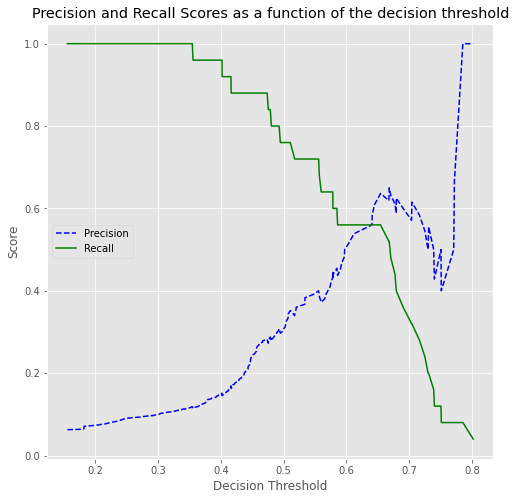

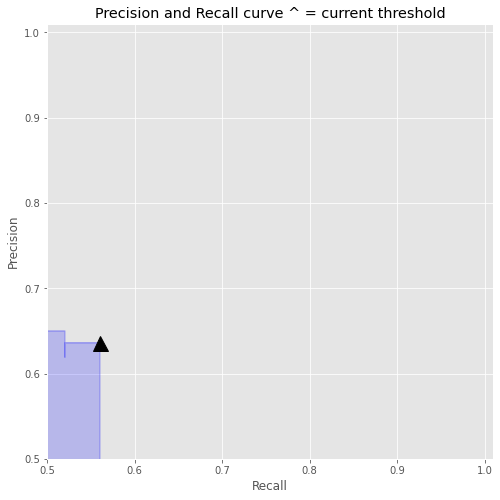

In [132]:
DecentWork_y_scores = DecentWork_NB_pipeline.predict_proba(DecentWork_test['transcripts_simplified'])[:, 1]
DecentWork_precision, DecentWork_recall, DecentWork_thresholds = precision_recall_curve(DecentWork_test['DecentWork'], DecentWork_y_scores)

# map of precision vs recall
plot_precision_recall_vs_threshold(DecentWork_precision,DecentWork_recall,DecentWork_thresholds)

# once found the best threshold, 
precision_recall_threshold(DecentWork_test['DecentWork'], DecentWork_y_scores, DecentWork_precision, DecentWork_recall, DecentWork_thresholds, 0.65)

In [34]:
IndustryInnovation_x_train = IndustryInnovation_train_aug['transcripts_simplified']
IndustryInnovation_y_train = IndustryInnovation_train_aug['IndustryInnovation']
IndustryInnovation_x_test = IndustryInnovation_test['transcripts_simplified']
IndustryInnovation_y_test = IndustryInnovation_test['IndustryInnovation']

IndustryInnovation_grid_lr = grid_search_wrapper(pipe_lr, lr_param_grid, IndustryInnovation_x_train, IndustryInnovation_y_train, IndustryInnovation_x_test, IndustryInnovation_y_test, refit_score='f1_score')
IndustryInnovation_grid_mnb = grid_search_wrapper(pipe_mnb, mnb_param_grid, IndustryInnovation_x_train, IndustryInnovation_y_train, IndustryInnovation_x_test, IndustryInnovation_y_test, refit_score='f1_score')
IndustryInnovation_grid_rf = grid_search_wrapper(pipe_rf, rf_param_grid, IndustryInnovation_x_train, IndustryInnovation_y_train, IndustryInnovation_x_test, IndustryInnovation_y_test, refit_score='f1_score')
IndustryInnovation_grid_knn = grid_search_wrapper(pipe_knn, knn_param_grid, IndustryInnovation_x_train, IndustryInnovation_y_train, IndustryInnovation_x_test, IndustryInnovation_y_test, refit_score='f1_score')
IndustryInnovation_grid_svm = grid_search_wrapper(pipe_svm, svm_param_grid, IndustryInnovation_x_train, IndustryInnovation_y_train, IndustryInnovation_x_test, IndustryInnovation_y_test, refit_score='f1_score')
IndustryInnovation_grid_xgb = grid_search_wrapper(pipe_xgb, xgb_param_grid, IndustryInnovation_x_train, IndustryInnovation_y_train, IndustryInnovation_x_test, IndustryInnovation_y_test, refit_score='f1_score')


Best params for f1_score
{'LR__C': 1.0, 'LR__penalty': 'l2', 'LR__solver': 'liblinear', 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       355
           1       0.36      0.68      0.47        44

    accuracy                           0.83       399
   macro avg       0.66      0.77      0.69       399
weighted avg       0.89      0.83      0.85       399

Confusion matrix of this model optimized for f1_score on the test data:
     pred_neg  pred_pos
neg       302        53
pos        14        30

Best params for f1_score
{'MNB__alpha': 0.5, 'MNB__fit_prior': False, 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       355
           1       0.31      0.66      0.42        44

    accuracy                           0.80       399
   macro avg       0.

In [134]:
#IndustryInnovation
IndustryInnovation_NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words, ngram_range=(1,2))), 
                ('svm',SVC(C=6,kernel='rbf',probability=True))
            ])

# compute the accuracy using a k-fold validation technique
IndustryInnovation_scores = []
for train_index, test_index in folds.split(IndustryInnovation_train_aug.transcripts_simplified,IndustryInnovation_train_aug.IndustryInnovation):
    SDG9_X_train, SDG9_X_test, SDG9_y_train, SDG9_y_test = IndustryInnovation_train_aug.transcripts_simplified[train_index],IndustryInnovation_train_aug.transcripts_simplified[test_index], \
                                       IndustryInnovation_train_aug.IndustryInnovation[train_index], IndustryInnovation_train_aug.IndustryInnovation[test_index]
    IndustryInnovation_scores.append(get_score(IndustryInnovation_NB_pipeline, SDG9_X_train, SDG9_X_test, SDG9_y_train, SDG9_y_test))

print(IndustryInnovation_scores)
print(np.mean(IndustryInnovation_scores))
print(np.std(IndustryInnovation_scores))

IndustryInnovation_prediction_test = IndustryInnovation_NB_pipeline.predict(IndustryInnovation_test['transcripts_simplified'])
print('IndustryInnovation test accuracy is {}'.format(accuracy_score(IndustryInnovation_test['IndustryInnovation'], IndustryInnovation_prediction_test)))
print(classification_report(IndustryInnovation_test['IndustryInnovation'], IndustryInnovation_prediction_test))
print(pd.DataFrame(confusion_matrix(IndustryInnovation_test['IndustryInnovation'], IndustryInnovation_prediction_test),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

[0.9838709677419355, 0.964516129032258, 0.9838709677419355, 0.9709677419354839, 0.9741100323624595, 0.970873786407767, 0.9741100323624595, 0.9805825242718447, 0.9805825242718447, 0.9805825242718447]
0.9764067230399835
0.006130852721681643
IndustryInnovation test accuracy is 0.9022556390977443
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       355
           1       0.59      0.39      0.47        44

    accuracy                           0.90       399
   macro avg       0.76      0.68      0.71       399
weighted avg       0.89      0.90      0.89       399

     pred_neg  pred_pos
neg       343        12
pos        27        17


     pred_neg  pred_pos
neg       343        12
pos        26        18


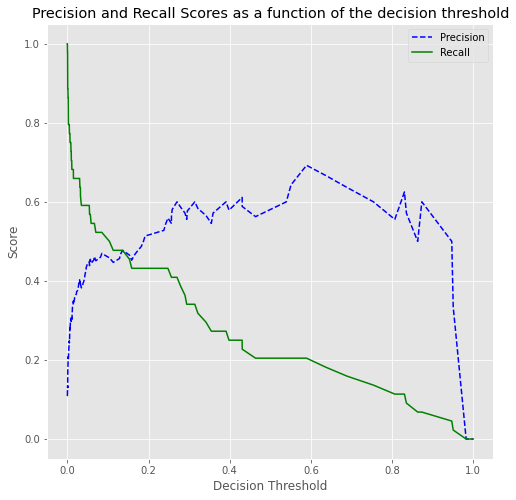

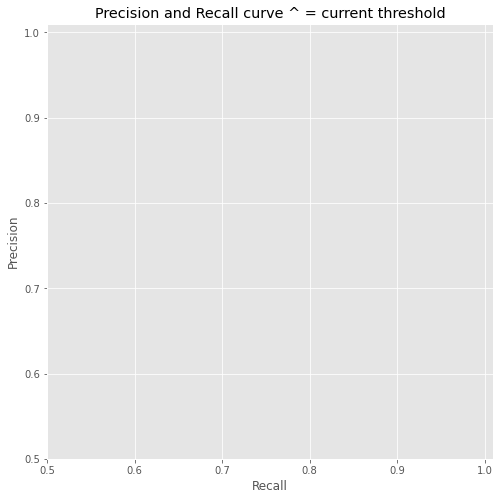

In [149]:
IndustryInnovation_y_scores = IndustryInnovation_NB_pipeline.predict_proba(IndustryInnovation_test['transcripts_simplified'])[:, 1]
IndustryInnovation_precision, IndustryInnovation_recall, IndustryInnovation_thresholds = precision_recall_curve(IndustryInnovation_test['IndustryInnovation'], IndustryInnovation_y_scores)

# map of precision vs recall
plot_precision_recall_vs_threshold(IndustryInnovation_precision,IndustryInnovation_recall,IndustryInnovation_thresholds)

# once found the best threshold, 
precision_recall_threshold(IndustryInnovation_test['IndustryInnovation'], IndustryInnovation_y_scores, IndustryInnovation_precision, IndustryInnovation_recall, IndustryInnovation_thresholds, 0.26)

In [35]:
ReduceInequality_x_train = ReduceInequality_train_aug['transcripts_simplified']
ReduceInequality_y_train = ReduceInequality_train_aug['ReduceInequality']
ReduceInequality_x_test = ReduceInequality_test['transcripts_simplified']
ReduceInequality_y_test = ReduceInequality_test['ReduceInequality']

ReduceInequality_grid_lr = grid_search_wrapper(pipe_lr, lr_param_grid, ReduceInequality_x_train, ReduceInequality_y_train, ReduceInequality_x_test, ReduceInequality_y_test, refit_score='f1_score')
ReduceInequality_grid_mnb = grid_search_wrapper(pipe_mnb, mnb_param_grid, ReduceInequality_x_train, ReduceInequality_y_train, ReduceInequality_x_test, ReduceInequality_y_test, refit_score='f1_score')
ReduceInequality_grid_rf = grid_search_wrapper(pipe_rf, rf_param_grid, ReduceInequality_x_train, ReduceInequality_y_train, ReduceInequality_x_test, ReduceInequality_y_test, refit_score='f1_score')
ReduceInequality_grid_knn = grid_search_wrapper(pipe_knn, knn_param_grid, ReduceInequality_x_train, ReduceInequality_y_train, ReduceInequality_x_test, ReduceInequality_y_test, refit_score='f1_score')
ReduceInequality_grid_svm = grid_search_wrapper(pipe_svm, svm_param_grid, ReduceInequality_x_train, ReduceInequality_y_train, ReduceInequality_x_test, ReduceInequality_y_test, refit_score='f1_score')
ReduceInequality_grid_xgb = grid_search_wrapper(pipe_xgb, xgb_param_grid, ReduceInequality_x_train, ReduceInequality_y_train, ReduceInequality_x_test, ReduceInequality_y_test, refit_score='f1_score')


Best params for f1_score
{'LR__C': 1.0, 'LR__penalty': 'l2', 'LR__solver': 'liblinear', 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       353
           1       0.42      0.67      0.52        46

    accuracy                           0.85       399
   macro avg       0.69      0.78      0.72       399
weighted avg       0.89      0.85      0.87       399

Confusion matrix of this model optimized for f1_score on the test data:
     pred_neg  pred_pos
neg       310        43
pos        15        31

Best params for f1_score
{'MNB__alpha': 0.5, 'MNB__fit_prior': False, 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.97      0.80      0.88       353
           1       0.35      0.80      0.48        46

    accuracy                           0.80       399
   macro avg       0.

In [151]:
#ReduceInequality
ReduceInequality_NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words,ngram_range=(1,2))),
                ('lr', LogisticRegression(C=1, penalty='l2',solver='liblinear'))
            ])

# compute the accuracy using a k-fold validation technique
ReduceInequality_scores = []
for train_index, test_index in folds.split(ReduceInequality_train_aug.transcripts_simplified,ReduceInequality_train_aug.ReduceInequality):
    SDG10_X_train, SDG10_X_test, SDG10_y_train, SDG10_y_test = ReduceInequality_train_aug.transcripts_simplified[train_index],ReduceInequality_train_aug.transcripts_simplified[test_index], \
                                       ReduceInequality_train_aug.ReduceInequality[train_index], ReduceInequality_train_aug.ReduceInequality[test_index]
    ReduceInequality_scores.append(get_score(ReduceInequality_NB_pipeline, SDG10_X_train, SDG10_X_test, SDG10_y_train, SDG10_y_test))

print(ReduceInequality_scores)
print(np.mean(ReduceInequality_scores))
print(np.std(ReduceInequality_scores))

ReduceInequality_prediction_test = ReduceInequality_NB_pipeline.predict(ReduceInequality_test['transcripts_simplified'])
print('ReduceInequality test accuracy is {}'.format(accuracy_score(ReduceInequality_test['ReduceInequality'], ReduceInequality_prediction_test)))
print(classification_report(ReduceInequality_test['ReduceInequality'], ReduceInequality_prediction_test))
print(pd.DataFrame(confusion_matrix(ReduceInequality_test['ReduceInequality'], ReduceInequality_prediction_test),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

[0.9419354838709677, 0.9064516129032258, 0.9064516129032258, 0.9354838709677419, 0.9029126213592233, 0.8932038834951457, 0.9255663430420712, 0.919093851132686, 0.9223300970873787, 0.912621359223301]
0.9166050735984967
0.014403011446450767
ReduceInequality test accuracy is 0.8546365914786967
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       353
           1       0.42      0.67      0.52        46

    accuracy                           0.85       399
   macro avg       0.69      0.78      0.72       399
weighted avg       0.89      0.85      0.87       399

     pred_neg  pred_pos
neg       310        43
pos        15        31


     pred_neg  pred_pos
neg       310        43
pos        15        31


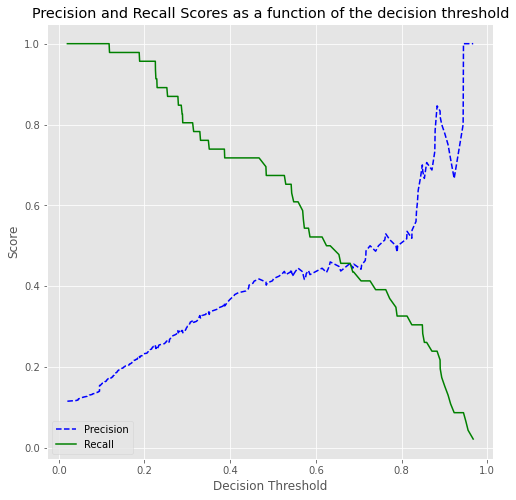

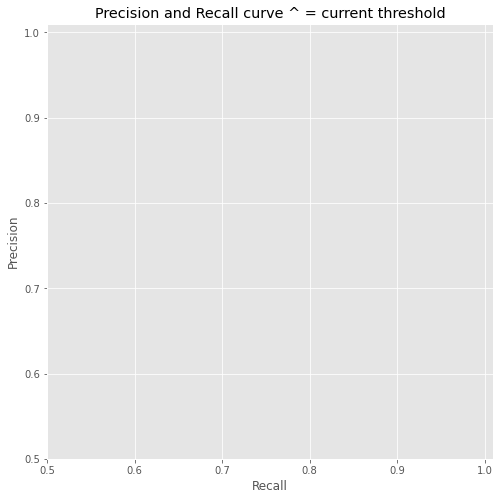

In [157]:
ReduceInequality_y_scores = ReduceInequality_NB_pipeline.predict_proba(ReduceInequality_test['transcripts_simplified'])[:, 1]
ReduceInequality_precision, ReduceInequality_recall, ReduceInequality_thresholds = precision_recall_curve(ReduceInequality_test['ReduceInequality'], ReduceInequality_y_scores)

# map of precision vs recall
plot_precision_recall_vs_threshold(ReduceInequality_precision,ReduceInequality_recall,ReduceInequality_thresholds)

# once found the best threshold, 
precision_recall_threshold(ReduceInequality_test['ReduceInequality'], ReduceInequality_y_scores, ReduceInequality_precision, ReduceInequality_recall, ReduceInequality_thresholds, 0.5)

In [37]:
SustainableCities_x_train = SustainableCities_train_aug['transcripts_simplified']
SustainableCities_y_train = SustainableCities_train_aug['SustainableCities']
SustainableCities_x_test = SustainableCities_test['transcripts_simplified']
SustainableCities_y_test = SustainableCities_test['SustainableCities']

SustainableCities_grid_lr = grid_search_wrapper(pipe_lr, lr_param_grid, SustainableCities_x_train, SustainableCities_y_train, SustainableCities_x_test, SustainableCities_y_test, refit_score='f1_score')
SustainableCities_grid_mnb = grid_search_wrapper(pipe_mnb, mnb_param_grid, SustainableCities_x_train, SustainableCities_y_train, SustainableCities_x_test, SustainableCities_y_test, refit_score='f1_score')
SustainableCities_grid_rf = grid_search_wrapper(pipe_rf, rf_param_grid, SustainableCities_x_train, SustainableCities_y_train, SustainableCities_x_test, SustainableCities_y_test, refit_score='f1_score')
SustainableCities_grid_knn = grid_search_wrapper(pipe_knn, knn_param_grid, SustainableCities_x_train, SustainableCities_y_train, SustainableCities_x_test, SustainableCities_y_test, refit_score='f1_score')
SustainableCities_grid_svm = grid_search_wrapper(pipe_svm, svm_param_grid, SustainableCities_x_train, SustainableCities_y_train, SustainableCities_x_test, SustainableCities_y_test, refit_score='f1_score')
SustainableCities_grid_xgb = grid_search_wrapper(pipe_xgb, xgb_param_grid, SustainableCities_x_train, SustainableCities_y_train, SustainableCities_x_test, SustainableCities_y_test, refit_score='f1_score')


Best params for f1_score
{'LR__C': 1.0, 'LR__penalty': 'l2', 'LR__solver': 'liblinear', 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       387
           1       0.19      0.33      0.24        12

    accuracy                           0.94       399
   macro avg       0.58      0.64      0.60       399
weighted avg       0.96      0.94      0.95       399

Confusion matrix of this model optimized for f1_score on the test data:
     pred_neg  pred_pos
neg       370        17
pos         8         4

Best params for f1_score
{'MNB__alpha': 0.5, 'MNB__fit_prior': True, 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       387
           1       0.15      0.67      0.24        12

    accuracy                           0.87       399
   macro avg       0.5

In [158]:
#SustainableCities
SustainableCities_NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('xgb',XGBClassifier(max_depth=6, min_samples_leaf=1, min_samples_split=6))
            ])

# SustainableCities_NB_pipeline.fit(SustainableCities_train_aug['transcripts_simplified'], SustainableCities_train_aug['SustainableCities'])

# compute the accuracy using a k-fold validation technique
SustainableCities_scores = []
for train_index, test_index in folds.split(SustainableCities_train_aug.transcripts_simplified,SustainableCities_train_aug.SustainableCities):
    SDG11_X_train, SDG11_X_test, SDG11_y_train, SDG11_y_test = SustainableCities_train_aug.transcripts_simplified[train_index],SustainableCities_train_aug.transcripts_simplified[test_index], \
                                       SustainableCities_train_aug.SustainableCities[train_index], SustainableCities_train_aug.SustainableCities[test_index]
    SustainableCities_scores.append(get_score(SustainableCities_NB_pipeline, SDG11_X_train, SDG11_X_test, SDG11_y_train, SDG11_y_test))

print(SustainableCities_scores)
print(np.mean(SustainableCities_scores))
print(np.std(SustainableCities_scores))

SustainableCities_prediction_test = SustainableCities_NB_pipeline.predict(SustainableCities_test['transcripts_simplified'])
print('SustainableCities test accuracy is {}'.format(accuracy_score(SustainableCities_test['SustainableCities'], SustainableCities_prediction_test)))
print(classification_report(SustainableCities_test['SustainableCities'], SustainableCities_prediction_test))
print(pd.DataFrame(confusion_matrix(SustainableCities_test['SustainableCities'], SustainableCities_prediction_test),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

[13:03:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:03:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:03:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parame

     pred_neg  pred_pos
neg       373        14
pos         8         4


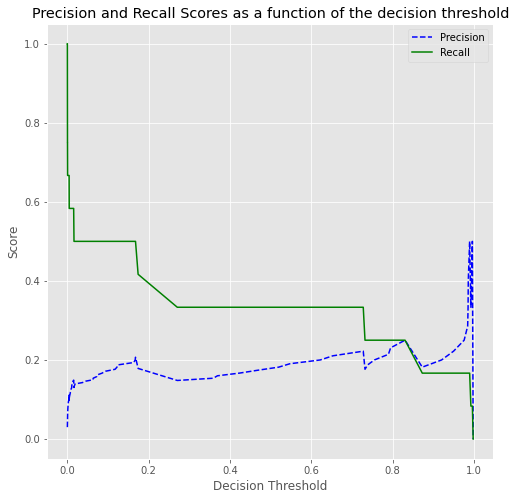

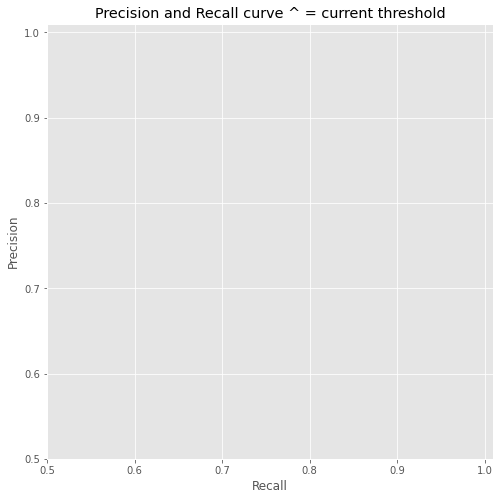

In [167]:
SustainableCities_y_scores = SustainableCities_NB_pipeline.predict_proba(SustainableCities_test['transcripts_simplified'])[:, 1]
SustainableCities_precision, SustainableCities_recall, SustainableCities_thresholds = precision_recall_curve(SustainableCities_test['SustainableCities'], SustainableCities_y_scores)

# map of precision vs recall
plot_precision_recall_vs_threshold(SustainableCities_precision,SustainableCities_recall,SustainableCities_thresholds)

# once found the best threshold, 
precision_recall_threshold(SustainableCities_test['SustainableCities'], SustainableCities_y_scores, SustainableCities_precision, SustainableCities_recall, SustainableCities_thresholds, 0.70)

In [38]:
ResponsibleConsumptionProduction_x_train = ResponsibleConsumptionProduction_train_aug['transcripts_simplified']
ResponsibleConsumptionProduction_y_train = ResponsibleConsumptionProduction_train_aug['ResponsibleConsumptionProduction']
ResponsibleConsumptionProduction_x_test = ResponsibleConsumptionProduction_test['transcripts_simplified']
ResponsibleConsumptionProduction_y_test = ResponsibleConsumptionProduction_test['ResponsibleConsumptionProduction']

ResponsibleConsumptionProduction_grid_lr = grid_search_wrapper(pipe_lr, lr_param_grid, ResponsibleConsumptionProduction_x_train, ResponsibleConsumptionProduction_y_train, ResponsibleConsumptionProduction_x_test, ResponsibleConsumptionProduction_y_test, refit_score='f1_score')
ResponsibleConsumptionProduction_grid_mnb = grid_search_wrapper(pipe_mnb, mnb_param_grid, ResponsibleConsumptionProduction_x_train, ResponsibleConsumptionProduction_y_train, ResponsibleConsumptionProduction_x_test, ResponsibleConsumptionProduction_y_test, refit_score='f1_score')
ResponsibleConsumptionProduction_grid_rf = grid_search_wrapper(pipe_rf, rf_param_grid, ResponsibleConsumptionProduction_x_train, ResponsibleConsumptionProduction_y_train, ResponsibleConsumptionProduction_x_test, ResponsibleConsumptionProduction_y_test, refit_score='f1_score')
ResponsibleConsumptionProduction_grid_knn = grid_search_wrapper(pipe_knn, knn_param_grid, ResponsibleConsumptionProduction_x_train, ResponsibleConsumptionProduction_y_train, ResponsibleConsumptionProduction_x_test, ResponsibleConsumptionProduction_y_test, refit_score='f1_score')
ResponsibleConsumptionProduction_grid_svm = grid_search_wrapper(pipe_svm, svm_param_grid, ResponsibleConsumptionProduction_x_train, ResponsibleConsumptionProduction_y_train, ResponsibleConsumptionProduction_x_test, ResponsibleConsumptionProduction_y_test, refit_score='f1_score')
ResponsibleConsumptionProduction_grid_xgb = grid_search_wrapper(pipe_xgb, xgb_param_grid, ResponsibleConsumptionProduction_x_train, ResponsibleConsumptionProduction_y_train, ResponsibleConsumptionProduction_x_test, ResponsibleConsumptionProduction_y_test, refit_score='f1_score')


Best params for f1_score
{'LR__C': 1.0, 'LR__penalty': 'l2', 'LR__solver': 'liblinear', 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       391
           1       0.29      0.75      0.41         8

    accuracy                           0.96       399
   macro avg       0.64      0.86      0.70       399
weighted avg       0.98      0.96      0.97       399

Confusion matrix of this model optimized for f1_score on the test data:
     pred_neg  pred_pos
neg       376        15
pos         2         6

Best params for f1_score
{'MNB__alpha': 0.5, 'MNB__fit_prior': True, 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.99      0.90      0.95       391
           1       0.14      0.75      0.23         8

    accuracy                           0.90       399
   macro avg       0.5

In [169]:
#ResponsibleConsumptionProduction
ResponsibleConsumptionProduction_NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words, ngram_range=(1,2))),
                ('lf',LogisticRegression(C=1, penalty='l2', solver='liblinear'))
            ])

# compute the accuracy using a k-fold validation technique
ResponsibleConsumptionProduction_scores = []
for train_index, test_index in folds.split(ResponsibleConsumptionProduction_train_aug.transcripts_simplified,ResponsibleConsumptionProduction_train_aug.ResponsibleConsumptionProduction):
    SDG12_X_train, SDG12_X_test, SDG12_y_train, SDG12_y_test = ResponsibleConsumptionProduction_train_aug.transcripts_simplified[train_index],ResponsibleConsumptionProduction_train_aug.transcripts_simplified[test_index], \
                                       ResponsibleConsumptionProduction_train_aug.ResponsibleConsumptionProduction[train_index], ResponsibleConsumptionProduction_train_aug.ResponsibleConsumptionProduction[test_index]
    ResponsibleConsumptionProduction_scores.append(get_score(ResponsibleConsumptionProduction_NB_pipeline, SDG12_X_train, SDG12_X_test, SDG12_y_train, SDG12_y_test))

print(ResponsibleConsumptionProduction_scores)
print(np.mean(ResponsibleConsumptionProduction_scores))
print(np.std(ResponsibleConsumptionProduction_scores))

ResponsibleConsumptionProduction_prediction_test = ResponsibleConsumptionProduction_NB_pipeline.predict(ResponsibleConsumptionProduction_test['transcripts_simplified'])
print('ResponsibleConsumptionProduction test accuracy is {}'.format(accuracy_score(ResponsibleConsumptionProduction_test['ResponsibleConsumptionProduction'], ResponsibleConsumptionProduction_prediction_test)))
print(classification_report(ResponsibleConsumptionProduction_test['ResponsibleConsumptionProduction'], ResponsibleConsumptionProduction_prediction_test))
print(pd.DataFrame(confusion_matrix(ResponsibleConsumptionProduction_test['ResponsibleConsumptionProduction'], ResponsibleConsumptionProduction_prediction_test),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

[0.9612903225806452, 0.9709677419354839, 0.9806451612903225, 0.9935483870967742, 0.9870550161812298, 0.9902912621359223, 0.9773462783171522, 0.9870550161812298, 0.9805825242718447, 0.9838187702265372]
0.9812600480217142
0.00909479352734372
ResponsibleConsumptionProduction test accuracy is 0.9548872180451128
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       391
           1       0.27      0.75      0.40         8

    accuracy                           0.95       399
   macro avg       0.63      0.85      0.69       399
weighted avg       0.98      0.95      0.97       399

     pred_neg  pred_pos
neg       375        16
pos         2         6


     pred_neg  pred_pos
neg       382         9
pos         2         6


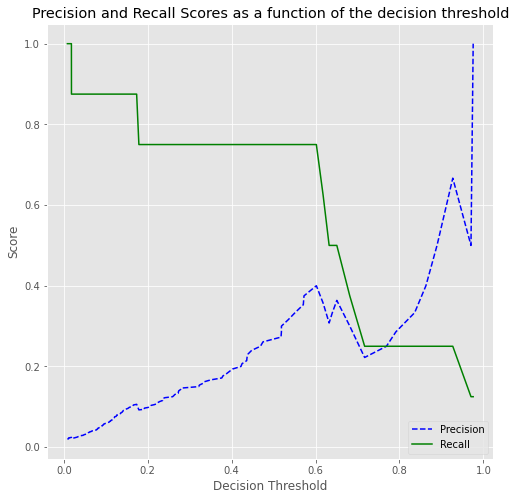

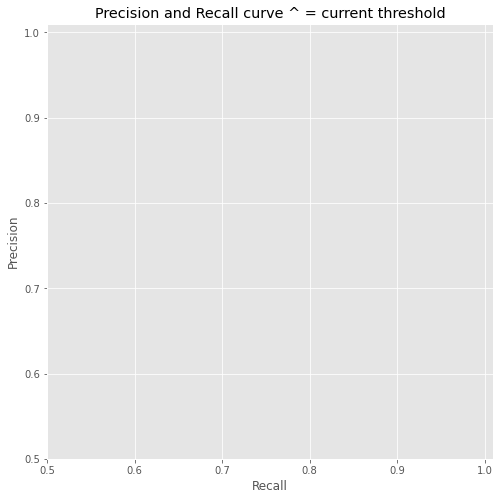

In [171]:
ResponsibleConsumptionProduction_y_scores = ResponsibleConsumptionProduction_NB_pipeline.predict_proba(ResponsibleConsumptionProduction_test['transcripts_simplified'])[:, 1]
ResponsibleConsumptionProduction_precision, ResponsibleConsumptionProduction_recall, ResponsibleConsumptionProduction_thresholds = precision_recall_curve(ResponsibleConsumptionProduction_test['ResponsibleConsumptionProduction'], ResponsibleConsumptionProduction_y_scores)

# map of precision vs recall
plot_precision_recall_vs_threshold(ResponsibleConsumptionProduction_precision,ResponsibleConsumptionProduction_recall,ResponsibleConsumptionProduction_thresholds)

# once found the best threshold, 
precision_recall_threshold(ResponsibleConsumptionProduction_test['ResponsibleConsumptionProduction'], ResponsibleConsumptionProduction_y_scores, ResponsibleConsumptionProduction_precision, ResponsibleConsumptionProduction_recall, ResponsibleConsumptionProduction_thresholds, 0.60)

In [39]:
ClimateAction_x_train = ClimateAction_train_aug['transcripts_simplified']
ClimateAction_y_train = ClimateAction_train_aug['ClimateAction']
ClimateAction_x_test = ClimateAction_test['transcripts_simplified']
ClimateAction_y_test = ClimateAction_test['ClimateAction']

ClimateAction_grid_lr = grid_search_wrapper(pipe_lr, lr_param_grid, ClimateAction_x_train, ClimateAction_y_train, ClimateAction_x_test, ClimateAction_y_test, refit_score='f1_score')
ClimateAction_grid_mnb = grid_search_wrapper(pipe_mnb, mnb_param_grid, ClimateAction_x_train, ClimateAction_y_train, ClimateAction_x_test, ClimateAction_y_test, refit_score='f1_score')
ClimateAction_grid_rf = grid_search_wrapper(pipe_rf, rf_param_grid, ClimateAction_x_train, ClimateAction_y_train, ClimateAction_x_test, ClimateAction_y_test, refit_score='f1_score')
ClimateAction_grid_knn = grid_search_wrapper(pipe_knn, knn_param_grid, ClimateAction_x_train, ClimateAction_y_train, ClimateAction_x_test, ClimateAction_y_test, refit_score='f1_score')
ClimateAction_grid_svm = grid_search_wrapper(pipe_svm, svm_param_grid, ClimateAction_x_train, ClimateAction_y_train, ClimateAction_x_test, ClimateAction_y_test, refit_score='f1_score')
ClimateAction_grid_xgb = grid_search_wrapper(pipe_xgb, xgb_param_grid, ClimateAction_x_train, ClimateAction_y_train, ClimateAction_x_test, ClimateAction_y_test, refit_score='f1_score')


Best params for f1_score
{'LR__C': 1.0, 'LR__penalty': 'l2', 'LR__solver': 'liblinear', 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       392
           1       0.09      0.14      0.11         7

    accuracy                           0.96       399
   macro avg       0.54      0.56      0.55       399
weighted avg       0.97      0.96      0.96       399

Confusion matrix of this model optimized for f1_score on the test data:
     pred_neg  pred_pos
neg       382        10
pos         6         1

Best params for f1_score
{'MNB__alpha': 0.5, 'MNB__fit_prior': True, 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       392
           1       0.12      0.43      0.19         7

    accuracy                           0.94       399
   macro avg       0.5

In [173]:
#ClimateAction
ClimateAction_NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words,ngram_range=(1,2))),
                ('mnb',MultinomialNB(alpha=0.5, fit_prior=True))
            ])

# compute the accuracy using a k-fold validation technique
ClimateAction_scores = []
for train_index, test_index in folds.split(ClimateAction_train_aug.transcripts_simplified,ClimateAction_train_aug.ClimateAction):
    SDG13_X_train, SDG13_X_test, SDG13_y_train, SDG13_y_test = ClimateAction_train_aug.transcripts_simplified[train_index],ClimateAction_train_aug.transcripts_simplified[test_index], \
                                       ClimateAction_train_aug.ClimateAction[train_index], ClimateAction_train_aug.ClimateAction[test_index]
    ClimateAction_scores.append(get_score(ClimateAction_NB_pipeline, SDG13_X_train, SDG13_X_test, SDG13_y_train, SDG13_y_test))

print(ClimateAction_scores)
print(np.mean(ClimateAction_scores))
print(np.std(ClimateAction_scores))

ClimateAction_prediction_test = ClimateAction_NB_pipeline.predict(ClimateAction_test['transcripts_simplified'])
print('ClimateAction test accuracy is {}'.format(accuracy_score(ClimateAction_test['ClimateAction'], ClimateAction_prediction_test)))
print(classification_report(ClimateAction_test['ClimateAction'], ClimateAction_prediction_test))
print(pd.DataFrame(confusion_matrix(ClimateAction_test['ClimateAction'], ClimateAction_prediction_test),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

[0.9387096774193548, 0.9354838709677419, 0.9419354838709677, 0.9741935483870968, 0.9579288025889967, 0.9546925566343042, 0.9288025889967637, 0.9514563106796117, 0.9579288025889967, 0.9676375404530745]
0.9508769182586908
0.013751907321213237
ClimateAction test accuracy is 0.9348370927318296
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       392
           1       0.12      0.43      0.19         7

    accuracy                           0.93       399
   macro avg       0.55      0.69      0.58       399
weighted avg       0.97      0.93      0.95       399

     pred_neg  pred_pos
neg       370        22
pos         4         3


     pred_neg  pred_pos
neg       373        19
pos         4         3


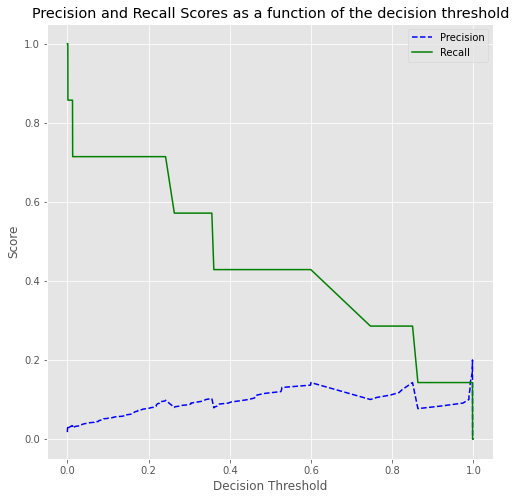

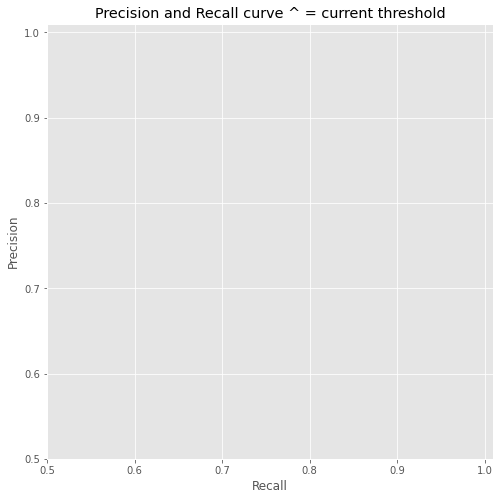

In [177]:
ClimateAction_y_scores = ClimateAction_NB_pipeline.predict_proba(ClimateAction_test['transcripts_simplified'])[:, 1]
ClimateAction_precision, ClimateAction_recall, ClimateAction_thresholds = precision_recall_curve(ClimateAction_test['ClimateAction'], ClimateAction_y_scores)

# map of precision vs recall
plot_precision_recall_vs_threshold(ClimateAction_precision,ClimateAction_recall,ClimateAction_thresholds)

# once found the best threshold, 
precision_recall_threshold(ClimateAction_test['ClimateAction'], ClimateAction_y_scores, ClimateAction_precision, ClimateAction_recall, ClimateAction_thresholds, 0.59)

In [40]:
LifeBelowWater_x_train = LifeBelowWater_train_aug['transcripts_simplified']
LifeBelowWater_y_train = LifeBelowWater_train_aug['LifeBelowWater']
LifeBelowWater_x_test = LifeBelowWater_test['transcripts_simplified']
LifeBelowWater_y_test = LifeBelowWater_test['LifeBelowWater']

LifeBelowWater_grid_lr = grid_search_wrapper(pipe_lr, lr_param_grid, LifeBelowWater_x_train, LifeBelowWater_y_train, LifeBelowWater_x_test, LifeBelowWater_y_test, refit_score='f1_score')
LifeBelowWater_grid_mnb = grid_search_wrapper(pipe_mnb, mnb_param_grid, LifeBelowWater_x_train, LifeBelowWater_y_train, LifeBelowWater_x_test, LifeBelowWater_y_test, refit_score='f1_score')
LifeBelowWater_grid_rf = grid_search_wrapper(pipe_rf, rf_param_grid, LifeBelowWater_x_train, LifeBelowWater_y_train, LifeBelowWater_x_test, LifeBelowWater_y_test, refit_score='f1_score')
LifeBelowWater_grid_knn = grid_search_wrapper(pipe_knn, knn_param_grid, LifeBelowWater_x_train, LifeBelowWater_y_train, LifeBelowWater_x_test, LifeBelowWater_y_test, refit_score='f1_score')
LifeBelowWater_grid_svm = grid_search_wrapper(pipe_svm, svm_param_grid, LifeBelowWater_x_train, LifeBelowWater_y_train, LifeBelowWater_x_test, LifeBelowWater_y_test, refit_score='f1_score')
LifeBelowWater_grid_xgb = grid_search_wrapper(pipe_xgb, xgb_param_grid, LifeBelowWater_x_train, LifeBelowWater_y_train, LifeBelowWater_x_test, LifeBelowWater_y_test, refit_score='f1_score')


Best params for f1_score
{'LR__C': 1.0, 'LR__penalty': 'l1', 'LR__solver': 'liblinear', 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       397
           1       0.00      0.00      0.00         2

    accuracy                           0.99       399
   macro avg       0.50      0.50      0.50       399
weighted avg       0.99      0.99      0.99       399

Confusion matrix of this model optimized for f1_score on the test data:
     pred_neg  pred_pos
neg       395         2
pos         2         0

Best params for f1_score
{'MNB__alpha': 0.5, 'MNB__fit_prior': True, 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       397
           1       0.05      0.50      0.08         2

    accuracy                           0.94       399
   macro avg       0.5

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       397
           1       0.00      0.00      0.00         2

    accuracy                           0.99       399
   macro avg       0.50      0.50      0.50       399
weighted avg       0.99      0.99      0.99       399

Confusion matrix of this model optimized for f1_score on the test data:
     pred_neg  pred_pos
neg       397         0
pos         2         0

Best params for f1_score
{'SVM__C': 1, 'SVM__kernel': 'rbf', 'tfidf__ngram_range': (1, 1)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       397
           1       0.00      0.00      0.00         2

    accuracy                           0.99       399
   macro avg       0.50      0.50      0.50       399
weighted avg       0.99      0.99      0.99       399

Confusion matrix of this model optimized for f1_score on the test data:
   

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,


Best params for f1_score
{'XGB__learning_rate': 0.3, 'XGB__max_depth': 5, 'XGB__min_child_weight': 1, 'XGB__n_estimators': 50, 'XGB__subsample': 0.5, 'tfidf__ngram_range': (1, 1)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       397
           1       0.00      0.00      0.00         2

    accuracy                           0.99       399
   macro avg       0.50      0.50      0.50       399
weighted avg       0.99      0.99      0.99       399

Confusion matrix of this model optimized for f1_score on the test data:
     pred_neg  pred_pos
neg       395         2
pos         2         0


In [178]:
#LifeBelowWater
LifeBelowWater_NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words,ngram_range=(1,2))),
                ('mnb',MultinomialNB(alpha=0.5, fit_prior=True))
            ])

# compute the accuracy using a k-fold validation technique
LifeBelowWater_scores = []
for train_index, test_index in folds.split(LifeBelowWater_train_aug.transcripts_simplified,LifeBelowWater_train_aug.LifeBelowWater):
    SDG14_X_train, SDG14_X_test, SDG14_y_train, SDG14_y_test = LifeBelowWater_train_aug.transcripts_simplified[train_index],LifeBelowWater_train_aug.transcripts_simplified[test_index], \
                                       LifeBelowWater_train_aug.LifeBelowWater[train_index], LifeBelowWater_train_aug.LifeBelowWater[test_index]
    LifeBelowWater_scores.append(get_score(LifeBelowWater_NB_pipeline, SDG14_X_train, SDG14_X_test, SDG14_y_train, SDG14_y_test))

print(LifeBelowWater_scores)
print(np.mean(LifeBelowWater_scores))
print(np.std(LifeBelowWater_scores))

LifeBelowWater_prediction_test = LifeBelowWater_NB_pipeline.predict(LifeBelowWater_test['transcripts_simplified'])
print('LifeBelowWater test accuracy is {}'.format(accuracy_score(LifeBelowWater_test['LifeBelowWater'], LifeBelowWater_prediction_test)))
print(classification_report(LifeBelowWater_test['LifeBelowWater'], LifeBelowWater_prediction_test))
print(pd.DataFrame(confusion_matrix(LifeBelowWater_test['LifeBelowWater'], LifeBelowWater_prediction_test),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

[0.9838709677419355, 0.9838709677419355, 0.9838709677419355, 0.9741935483870968, 0.970873786407767, 0.9870550161812298, 0.9805825242718447, 0.9838187702265372, 0.9741100323624595, 0.9967637540453075]
0.9819010335108048
0.0071149652627399
LifeBelowWater test accuracy is 0.9448621553884712
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       397
           1       0.05      0.50      0.08         2

    accuracy                           0.94       399
   macro avg       0.52      0.72      0.53       399
weighted avg       0.99      0.94      0.97       399

     pred_neg  pred_pos
neg       376        21
pos         1         1


     pred_neg  pred_pos
neg       377        20
pos         1         1


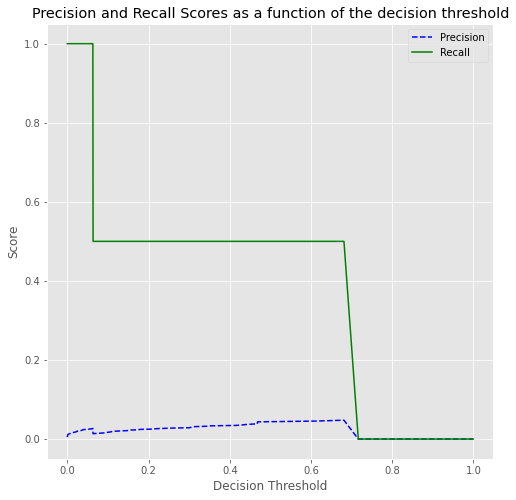

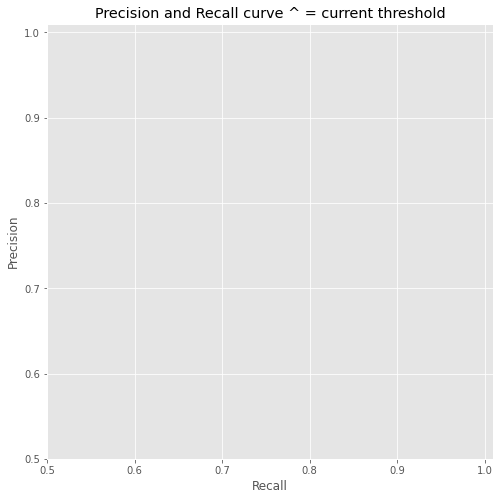

In [183]:
LifeBelowWater_y_scores = LifeBelowWater_NB_pipeline.predict_proba(LifeBelowWater_test['transcripts_simplified'])[:, 1]
LifeBelowWater_precision, LifeBelowWater_recall, LifeBelowWater_thresholds = precision_recall_curve(LifeBelowWater_test['LifeBelowWater'], LifeBelowWater_y_scores)

# map of precision vs recall
plot_precision_recall_vs_threshold(LifeBelowWater_precision,LifeBelowWater_recall,LifeBelowWater_thresholds)

# once found the best threshold, 
precision_recall_threshold(LifeBelowWater_test['LifeBelowWater'], LifeBelowWater_y_scores, LifeBelowWater_precision, LifeBelowWater_recall, LifeBelowWater_thresholds, 0.65)

In [41]:
LifeonLand_x_train = LifeonLand_train_aug['transcripts_simplified']
LifeonLand_y_train = LifeonLand_train_aug['LifeonLand']
LifeonLand_x_test = LifeonLand_test['transcripts_simplified']
LifeonLand_y_test = LifeonLand_test['LifeonLand']

LifeonLand_grid_lr = grid_search_wrapper(pipe_lr, lr_param_grid, LifeonLand_x_train, LifeonLand_y_train, LifeonLand_x_test, LifeonLand_y_test, refit_score='f1_score')
LifeonLand_grid_mnb = grid_search_wrapper(pipe_mnb, mnb_param_grid, LifeonLand_x_train, LifeonLand_y_train, LifeonLand_x_test, LifeonLand_y_test, refit_score='f1_score')
LifeonLand_grid_rf = grid_search_wrapper(pipe_rf, rf_param_grid, LifeonLand_x_train, LifeonLand_y_train, LifeonLand_x_test, LifeonLand_y_test, refit_score='f1_score')
LifeonLand_grid_knn = grid_search_wrapper(pipe_knn, knn_param_grid, LifeonLand_x_train, LifeonLand_y_train, LifeonLand_x_test, LifeonLand_y_test, refit_score='f1_score')
LifeonLand_grid_svm = grid_search_wrapper(pipe_svm, svm_param_grid, LifeonLand_x_train, LifeonLand_y_train, LifeonLand_x_test, LifeonLand_y_test, refit_score='f1_score')
LifeonLand_grid_xgb = grid_search_wrapper(pipe_xgb, xgb_param_grid, LifeonLand_x_train, LifeonLand_y_train, LifeonLand_x_test, LifeonLand_y_test, refit_score='f1_score')


Best params for f1_score
{'LR__C': 1.0, 'LR__penalty': 'l2', 'LR__solver': 'liblinear', 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       395
           1       0.50      0.50      0.50         4

    accuracy                           0.99       399
   macro avg       0.75      0.75      0.75       399
weighted avg       0.99      0.99      0.99       399

Confusion matrix of this model optimized for f1_score on the test data:
     pred_neg  pred_pos
neg       393         2
pos         2         2

Best params for f1_score
{'MNB__alpha': 0.5, 'MNB__fit_prior': True, 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       395
           1       0.12      1.00      0.22         4

    accuracy                           0.93       399
   macro avg       0.5

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,


Best params for f1_score
{'XGB__learning_rate': 0.3, 'XGB__max_depth': 5, 'XGB__min_child_weight': 1, 'XGB__n_estimators': 50, 'XGB__subsample': 1.0, 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       395
           1       0.50      0.50      0.50         4

    accuracy                           0.99       399
   macro avg       0.75      0.75      0.75       399
weighted avg       0.99      0.99      0.99       399

Confusion matrix of this model optimized for f1_score on the test data:
     pred_neg  pred_pos
neg       393         2
pos         2         2


In [184]:
#LifeonLand
LifeonLand_NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('rf', RandomForestClassifier(max_depth=6, min_samples_leaf=1, min_samples_split=2))
            ])

# compute the accuracy using a k-fold validation technique
LifeonLand_scores = []
for train_index, test_index in folds.split(LifeonLand_train_aug.transcripts_simplified,LifeonLand_train_aug.LifeonLand):
    SDG15_X_train, SDG15_X_test, SDG15_y_train, SDG15_y_test = LifeonLand_train_aug.transcripts_simplified[train_index],LifeonLand_train_aug.transcripts_simplified[test_index], \
                                       LifeonLand_train_aug.LifeonLand[train_index], LifeonLand_train_aug.LifeonLand[test_index]
    LifeonLand_scores.append(get_score(LifeonLand_NB_pipeline, SDG15_X_train, SDG15_X_test, SDG15_y_train, SDG15_y_test))

print(LifeonLand_scores)
print(np.mean(LifeonLand_scores))
print(np.std(LifeonLand_scores))

LifeonLand_prediction_test = LifeonLand_NB_pipeline.predict(LifeonLand_test['transcripts_simplified'])
print('LifeonLand test accuracy is {}'.format(accuracy_score(LifeonLand_test['LifeonLand'], LifeonLand_prediction_test)))
print(classification_report(LifeonLand_test['LifeonLand'], LifeonLand_prediction_test))
print(pd.DataFrame(confusion_matrix(LifeonLand_test['LifeonLand'], LifeonLand_prediction_test),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

[0.9838709677419355, 0.9903225806451613, 0.9612903225806452, 0.967741935483871, 1.0, 0.970873786407767, 0.9902912621359223, 0.9644012944983819, 0.9741100323624595, 0.9676375404530745]
0.9770539722309218
0.012470369000632045
LifeonLand test accuracy is 0.9899749373433584
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       395
           1       0.50      0.25      0.33         4

    accuracy                           0.99       399
   macro avg       0.75      0.62      0.66       399
weighted avg       0.99      0.99      0.99       399

     pred_neg  pred_pos
neg       394         1
pos         3         1


     pred_neg  pred_pos
neg       393         2
pos         2         2


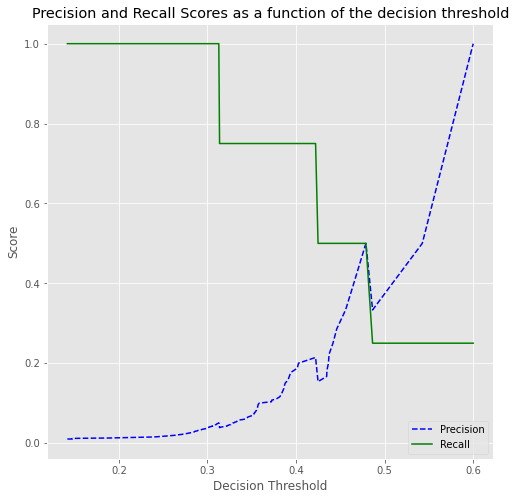

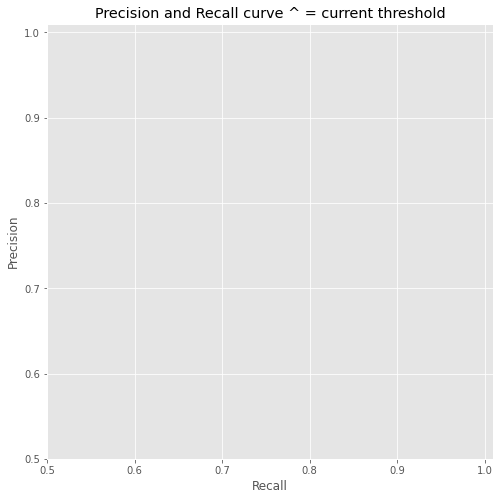

In [195]:
LifeonLand_y_scores = LifeonLand_NB_pipeline.predict_proba(LifeonLand_test['transcripts_simplified'])[:, 1]
LifeonLand_precision, LifeonLand_recall, LifeonLand_thresholds = precision_recall_curve(LifeonLand_test['LifeonLand'], LifeonLand_y_scores)

# map of precision vs recall
plot_precision_recall_vs_threshold(LifeonLand_precision,LifeonLand_recall,LifeonLand_thresholds)

# once found the best threshold, 
precision_recall_threshold(LifeonLand_test['LifeonLand'], LifeonLand_y_scores, LifeonLand_precision, LifeonLand_recall, LifeonLand_thresholds, 0.47)

In [43]:
PeaceJustice_x_train = PeaceJustice_train_aug['transcripts_simplified']
PeaceJustice_y_train = PeaceJustice_train_aug['PeaceJustice']
PeaceJustice_x_test = PeaceJustice_test['transcripts_simplified']
PeaceJustice_y_test = PeaceJustice_test['PeaceJustice']

PeaceJustice_grid_lr = grid_search_wrapper(pipe_lr, lr_param_grid, PeaceJustice_x_train, PeaceJustice_y_train, PeaceJustice_x_test, PeaceJustice_y_test, refit_score='f1_score')
PeaceJustice_grid_mnb = grid_search_wrapper(pipe_mnb, mnb_param_grid, PeaceJustice_x_train, PeaceJustice_y_train, PeaceJustice_x_test, PeaceJustice_y_test, refit_score='f1_score')
PeaceJustice_grid_rf = grid_search_wrapper(pipe_rf, rf_param_grid, PeaceJustice_x_train, PeaceJustice_y_train, PeaceJustice_x_test, PeaceJustice_y_test, refit_score='f1_score')
PeaceJustice_grid_knn = grid_search_wrapper(pipe_knn, knn_param_grid, PeaceJustice_x_train, PeaceJustice_y_train, PeaceJustice_x_test, PeaceJustice_y_test, refit_score='f1_score')
PeaceJustice_grid_svm = grid_search_wrapper(pipe_svm, svm_param_grid, PeaceJustice_x_train, PeaceJustice_y_train, PeaceJustice_x_test, PeaceJustice_y_test, refit_score='f1_score')
PeaceJustice_grid_xgb = grid_search_wrapper(pipe_xgb, xgb_param_grid, PeaceJustice_x_train, PeaceJustice_y_train, PeaceJustice_x_test, PeaceJustice_y_test, refit_score='f1_score')


Best params for f1_score
{'LR__C': 1.0, 'LR__penalty': 'l2', 'LR__solver': 'liblinear', 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       375
           1       0.33      0.58      0.42        24

    accuracy                           0.90       399
   macro avg       0.65      0.75      0.68       399
weighted avg       0.93      0.90      0.91       399

Confusion matrix of this model optimized for f1_score on the test data:
     pred_neg  pred_pos
neg       346        29
pos        10        14

Best params for f1_score
{'MNB__alpha': 0.5, 'MNB__fit_prior': False, 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.98      0.79      0.88       375
           1       0.19      0.75      0.30        24

    accuracy                           0.79       399
   macro avg       0.

In [196]:
#PeaceJustice
PeaceJustice_NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words,ngram_range=(1,2))),
                ('xgb',XGBClassifier(learning_rates=0.3,max_depth=6, min_child_weight=1,n_estimators=150,subsample=1))
            ])

# compute the accuracy using a k-fold validation technique
PeaceJustice_scores = []
for train_index, test_index in folds.split(PeaceJustice_train_aug.transcripts_simplified,PeaceJustice_train_aug.PeaceJustice):
    SDG16_X_train, SDG16_X_test, SDG16_y_train, SDG16_y_test = PeaceJustice_train_aug.transcripts_simplified[train_index],PeaceJustice_train_aug.transcripts_simplified[test_index], \
                                       PeaceJustice_train_aug.PeaceJustice[train_index], PeaceJustice_train_aug.PeaceJustice[test_index]
    PeaceJustice_scores.append(get_score(PeaceJustice_NB_pipeline, SDG16_X_train, SDG16_X_test, SDG16_y_train, SDG16_y_test))

print(PeaceJustice_scores)
print(np.mean(PeaceJustice_scores))
print(np.std(PeaceJustice_scores))

PeaceJustice_prediction_test = PeaceJustice_NB_pipeline.predict(PeaceJustice_test['transcripts_simplified'])
print('PeaceJustice test accuracy is {}'.format(accuracy_score(PeaceJustice_test['PeaceJustice'], PeaceJustice_prediction_test)))
print(classification_report(PeaceJustice_test['PeaceJustice'], PeaceJustice_prediction_test))
print(pd.DataFrame(confusion_matrix(PeaceJustice_test['PeaceJustice'], PeaceJustice_prediction_test),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

[13:14:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learning_rates" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:14:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learning_rates" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:14:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learning_rates" } might not be used.


     pred_neg  pred_pos
neg       358        17
pos         9        15


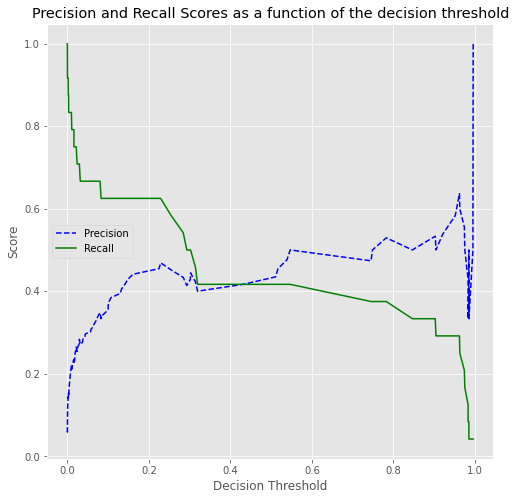

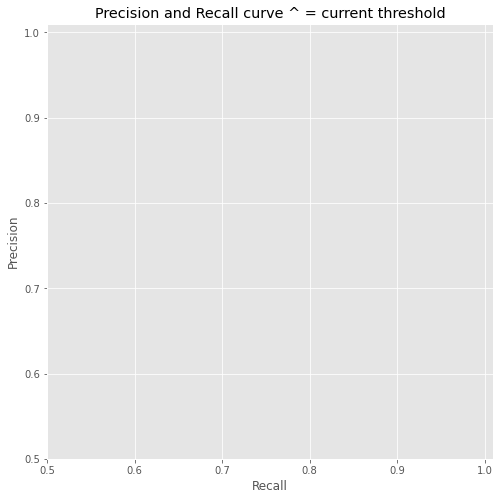

In [206]:
PeaceJustice_y_scores = PeaceJustice_NB_pipeline.predict_proba(PeaceJustice_test['transcripts_simplified'])[:, 1]
PeaceJustice_precision, PeaceJustice_recall, PeaceJustice_thresholds = precision_recall_curve(PeaceJustice_test['PeaceJustice'], PeaceJustice_y_scores)

# map of precision vs recall
plot_precision_recall_vs_threshold(PeaceJustice_precision,PeaceJustice_recall,PeaceJustice_thresholds)

# once found the best threshold, 
precision_recall_threshold(PeaceJustice_test['PeaceJustice'], PeaceJustice_y_scores, PeaceJustice_precision, PeaceJustice_recall, PeaceJustice_thresholds, 0.225)

In [12]:
Partnerships_x_train = Partnerships_train_aug['transcripts_simplified']
Partnerships_y_train = Partnerships_train_aug['Partnerships']
Partnerships_x_test = Partnerships_test['transcripts_simplified']
Partnerships_y_test = Partnerships_test['Partnerships']

Partnerships_grid_lr = grid_search_wrapper(pipe_lr, lr_param_grid, Partnerships_x_train, Partnerships_y_train, Partnerships_x_test, Partnerships_y_test, refit_score='f1_score')
Partnerships_grid_mnb = grid_search_wrapper(pipe_mnb, mnb_param_grid, Partnerships_x_train, Partnerships_y_train, Partnerships_x_test, Partnerships_y_test, refit_score='f1_score')
Partnerships_grid_rf = grid_search_wrapper(pipe_rf, rf_param_grid, Partnerships_x_train, Partnerships_y_train, Partnerships_x_test, Partnerships_y_test, refit_score='f1_score')
Partnerships_grid_knn = grid_search_wrapper(pipe_knn, knn_param_grid, Partnerships_x_train, Partnerships_y_train, Partnerships_x_test, Partnerships_y_test, refit_score='f1_score')
Partnerships_grid_svm = grid_search_wrapper(pipe_svm, svm_param_grid, Partnerships_x_train, Partnerships_y_train, Partnerships_x_test, Partnerships_y_test, refit_score='f1_score')
Partnerships_grid_xgb = grid_search_wrapper(pipe_xgb, xgb_param_grid, Partnerships_x_train, Partnerships_y_train, Partnerships_x_test, Partnerships_y_test, refit_score='f1_score')


Best params for f1_score
{'LR__C': 1.0, 'LR__penalty': 'l2', 'LR__solver': 'liblinear', 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       383
           1       0.20      0.62      0.31        16

    accuracy                           0.89       399
   macro avg       0.59      0.76      0.62       399
weighted avg       0.95      0.89      0.91       399

Confusion matrix of this model optimized for f1_score on the test data:
     pred_neg  pred_pos
neg       344        39
pos         6        10

Best params for f1_score
{'MNB__alpha': 0.5, 'MNB__fit_prior': True, 'tfidf__ngram_range': (1, 2)}
Classification report for f1_score
              precision    recall  f1-score   support

           0       0.99      0.80      0.89       383
           1       0.15      0.81      0.25        16

    accuracy                           0.80       399
   macro avg       0.5

In [207]:
#Partnerships
Partnerships_NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words,ngram_range=(1,2))),
                ('xgb',XGBClassifier(learning_rates=0.3,max_depth=6, min_child_weight=1,n_estimators=150,subsample=1))
            ])

# compute the accuracy using a k-fold validation technique
Partnerships_scores = []
for train_index, test_index in folds.split(Partnerships_train_aug.transcripts_simplified,Partnerships_train_aug.Partnerships):
    SDG17_X_train, SDG17_X_test, SDG17_y_train, SDG17_y_test = Partnerships_train_aug.transcripts_simplified[train_index],Partnerships_train_aug.transcripts_simplified[test_index], \
                                       Partnerships_train_aug.Partnerships[train_index], Partnerships_train_aug.Partnerships[test_index]
    Partnerships_scores.append(get_score(Partnerships_NB_pipeline, SDG17_X_train, SDG17_X_test, SDG17_y_train, SDG17_y_test))

print(Partnerships_scores)
print(np.mean(Partnerships_scores))
print(np.std(Partnerships_scores))

Partnerships_prediction_test = Partnerships_NB_pipeline.predict(Partnerships_test['transcripts_simplified'])
print('Partnerships test accuracy is {}'.format(accuracy_score(Partnerships_test['Partnerships'], Partnerships_prediction_test)))
print(classification_report(Partnerships_test['Partnerships'], Partnerships_prediction_test))
print(pd.DataFrame(confusion_matrix(Partnerships_test['Partnerships'], Partnerships_prediction_test),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

[13:25:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learning_rates" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:26:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learning_rates" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:26:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learning_rates" } might not be used.


     pred_neg  pred_pos
neg       370        13
pos         9         7


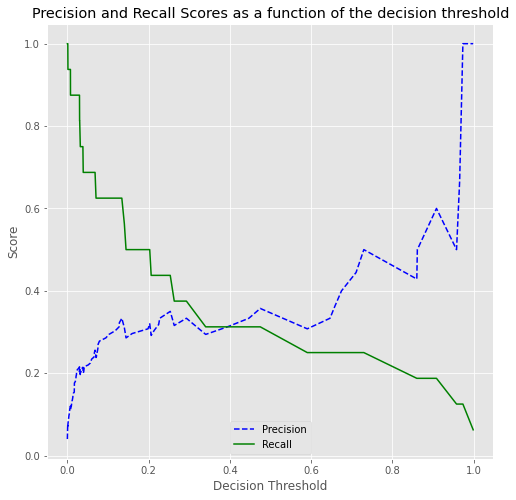

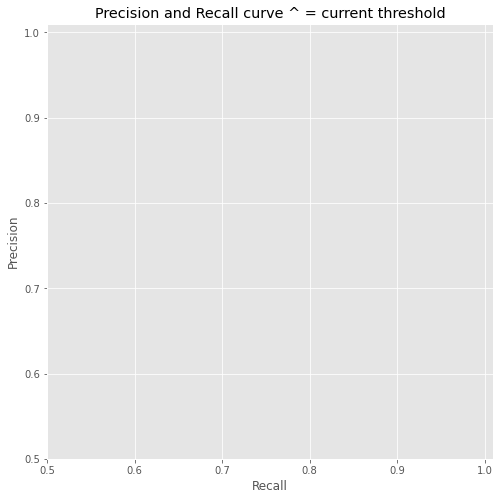

In [221]:
Partnerships_y_scores = Partnerships_NB_pipeline.predict_proba(Partnerships_test['transcripts_simplified'])[:, 1]
Partnerships_precision, Partnerships_recall, Partnerships_thresholds = precision_recall_curve(Partnerships_test['Partnerships'], Partnerships_y_scores)

# map of precision vs recall
plot_precision_recall_vs_threshold(Partnerships_precision,Partnerships_recall,Partnerships_thresholds)

# once found the best threshold, 
precision_recall_threshold(Partnerships_test['Partnerships'], Partnerships_y_scores, Partnerships_precision, Partnerships_recall, Partnerships_thresholds, 0.25)

In [ ]:
import joblib

NoPoverty_filename = 'NoPoverty_model.sav'
joblib.dump(NoPoverty_NB_pipeline, open(NoPoverty_filename, 'wb'))

ZeroHunger_filename = 'ZeroHunger_model.sav'
joblib.dump(ZeroHunger_NB_pipeline, open(ZeroHunger_filename, 'wb'))

GoodHealth_filename = 'GoodHealth_model.sav'
joblib.dump(GoodHealth_NB_pipeline, open(GoodHealth_filename, 'wb'))

QualityEducation_filename = 'QualityEducation_model.sav'
joblib.dump(QualityEducation_NB_pipeline, open(QualityEducation_filename, 'wb'))

GenderEquality_filename = 'GenderEquality_model.sav'
joblib.dump(GenderEquality_NB_pipeline, open(GenderEquality_filename, 'wb'))

CleanWater_filename = 'CleanWater_model.sav'
joblib.dump(CleanWater_NB_pipeline, open(CleanWater_filename, 'wb'))

AffordableCleanEnergy_filename = 'AffordableCleanEnergy_model.sav'
joblib.dump(AffordableCleanEnergy_NB_pipeline, open(AffordableCleanEnergy_filename, 'wb'))

DecentWork_filename = 'DecentWork_model.sav'
joblib.dump(DecentWork_NB_pipeline, open(DecentWork_filename, 'wb'))

IndustryInnovation_filename = 'IndustryInnovation_model.sav'
joblib.dump(IndustryInnovation_NB_pipeline, open(IndustryInnovation_filename, 'wb'))

ReduceInequality_filename = 'ReduceInequality_model.sav'
joblib.dump(ReduceInequality_NB_pipeline, open(ReduceInequality_filename, 'wb'))

SustainableCities_filename = 'SustainableCities_model.sav'
joblib.dump(SustainableCities_NB_pipeline, open(SustainableCities_filename, 'wb'))

ResponsibleConsumptionProduction_filename = 'ResponsibleConsumptionProduction_model.sav'
joblib.dump(ResponsibleConsumptionProduction_NB_pipeline, open(ResponsibleConsumptionProduction_filename, 'wb'))

ClimateAction_filename = 'ClimateAction_model.sav'
joblib.dump(ClimateAction_NB_pipeline, open(ClimateAction_filename, 'wb'))

LifeBelowWater_filename = 'LifeBelowWater_model.sav'
joblib.dump(LifeBelowWater_NB_pipeline, open(LifeBelowWater_filename, 'wb'))

LifeonLandy_filename = 'LifeonLand_model.sav'
joblib.dump(LifeonLand_NB_pipeline, open(LifeonLandy_filename, 'wb'))

PeaceJusticey_filename = 'PeaceJustice_model.sav'
joblib.dump(PeaceJustice_NB_pipeline, open(PeaceJusticey_filename, 'wb'))

Partnerships_filename = 'Partnerships_model.sav'
joblib.dump(Partnerships_NB_pipeline, open(Partnerships_filename, 'wb'))